In [1]:
import scipy.io

import pandas as pd
import numpy as np
import statistics

import math
import seaborn as sns

import statistics

import re 
from scipy.stats import spearmanr

#mat = scipy.io.loadmat('Full.mat')

from platform import python_version
print(python_version())

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

from itertools import combinations_with_replacement, combinations

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

from scipy.stats.stats import pearsonr, kendalltau, spearmanr

3.7.3


In [2]:
full = pd.read_excel('Full_true.xlsx')
full.head(2)

Unnamed: 0          Name  FPS  stallTime  duration  \
0           0  BigBuckBunny   30    4.03330   14.0333   
1           1  BigBuckBunny   30    0.53333   10.5333   

                      switching SwithcingMagnitide                 bitrates  \
0  [false. false. false. false]                NaN  222  222  222  222  222   
1     [false. true. true. true]      121  181  241  222  222  524  696  974   

                                   seqPSNR per frame  initial buffer time  \
0  23.2066      23.1989      23.1793      23.1564...              1.80000   
1  23.2066      23.1989      23.1793      23.1564...              0.53333   

   ... Rebuffer count  average duration of stalling event  mean(seqPSNR)  \
0  ...              3                             0.74444        27.5826   
1  ...              0                             0.00000        29.5138   

         MOS        Representation 1        Representation 2  \
0  31.376990  320x240_fps30_420_235k  320x240_fps30_420_235k   
1  51.006205  320x240_fps30_420_235k  320x240_fps30_420_235k   

         Representation 3        Representation 4         Representation 5  \
0  320x240_fps30_420_235k  320x240_fps30_420_235k   320x240_fps30_420_235k   
1  512x384_fps30_420_560k  512x384_fps30_420_750k  640x480_fps30_420_1050k   

  averageWeightedBitrate  
0                  222.0  
1                  527.6  

[2 rows x 21 columns]

In [3]:
#full = full.drop('seqPSNR per frame', axis = 1)
full = full.drop('Unnamed: 0', axis = 1)
full.head(1)

Name  FPS  stallTime  duration                     switching  \
0  BigBuckBunny   30     4.0333   14.0333  [false. false. false. false]   

  SwithcingMagnitide                 bitrates  \
0                NaN  222  222  222  222  222   

                                   seqPSNR per frame  initial buffer time  \
0  23.2066      23.1989      23.1793      23.1564...                  1.8   

  duration of stalling events in second  Rebuffer count  \
0       0.73333      1.0667     0.43333               3   

   average duration of stalling event  mean(seqPSNR)       MOS  \
0                             0.74444        27.5826  31.37699   

         Representation 1        Representation 2        Representation 3  \
0  320x240_fps30_420_235k  320x240_fps30_420_235k  320x240_fps30_420_235k   

         Representation 4        Representation 5  averageWeightedBitrate  
0  320x240_fps30_420_235k  320x240_fps30_420_235k                   222.0

In [4]:
full["MOS"][449]

87.92

In [5]:
#Сейчас проводится анализ тех данных, которые есть. Уберем сторки representation
#full = full.drop('Representation 1', axis = 1)
#full = full.drop('Representation 2', axis = 1)
#full = full.drop('Representation 3', axis = 1)
#full = full.drop('Representation 4', axis = 1)
#full = full.drop('Representation 5', axis = 1)

In [6]:
#Добавление SI/TI

siti = np.array([["BigBuckBunny",       96 ,97, "animation", "high motion"],
                 ["BirdOfPrey",         44 ,68, "nature","smooth motion"], 
                 ["Cheetah",            64, 37, "animals","camera motion"],
                 ["CostaRica",          45, 52, "natue","smooth motion"], 
                 ["CSGO",               70 ,52, "game","average motion"], 
                 ["FCB",                 80,46, "sports","average motion"], 
                 ["FrozenBanff",       100 ,88, "nature","smooth motion"], 
                 ["Mtv",               112,144, "human","average motion"], 
                 ["PuppiesBath",        35 ,45, "animals","smooth motion"],
                 ["RoastDuck",          60 ,84, "food","smooth motion"],
                 ["RushHour",           52 ,20, "human","smooth motion"],
                 ["Ski",                61 ,82, "sports","high motion"],
                 ["SlideEditing",      160 ,86, "screen","smooth motion"],
                 ["TallBuildings",      81 ,13, "architecture","static"],
                 ["TearsOfSteel1",      53 ,66, "movie","smooth motion"],
                 ["TearsOfSteel2",      56 ,11, "movie","static"],
                 ["TrafficAndBuilding", 66 ,15, "architecture","static"],
                 ["Transformer",        72 ,56, "movie","average motion"],
                 ["Valentines",          40,52, "human","smooth motion"],
                 ["ZapHighlight",        97,89, "animation","high motion"]], dtype = object)
print (len(siti[:,0])    )

20


In [7]:
cols = ["Name", "SI","TI","content", "motion"]
video_descr = pd.DataFrame(data=siti, columns = cols)
video_descr.head (2)

Name  SI  TI    content         motion
0  BigBuckBunny  96  97  animation    high motion
1    BirdOfPrey  44  68     nature  smooth motion

Text(0, 0.5, 'Spatial informationl')

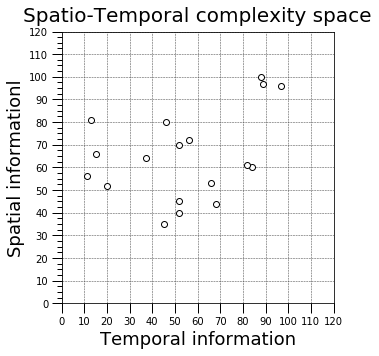

In [8]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(10.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(10.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 120)
ax.set_ylim(0, 120)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

X = video_descr ["TI"]
Y = video_descr ["SI"]

ax.plot(X, Y, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Spatio-Temporal complexity space", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("Temporal information", fontsize=18)
ax.set_ylabel("Spatial informationl", fontsize=18)

#plt.xlabel('xlabel', fontsize=18)

#ax.tick_params(axis="x", labelsize=14)
#ax.tick_params(axis="y", labelsize=14)

In [9]:
full["SI"] = np.nan
full["TI"] = np.nan
full["content"] = np.nan
full["motion"] = np.nan

for index, row in full.iterrows():
    #for name in siti[:,0]:
    for i in range (0, 20, 1):
        if row ["Name"] == siti[i][0]:
            full.loc[index,"SI"] = siti[i][1]
            full.loc[index,"TI"] = siti[i][2]
            
            full.loc[index,"content"] = siti[i][3]
            full.loc[index,"motion"] = siti[i][4]
       

In [10]:
full.head(2)

Name  FPS  stallTime  duration                     switching  \
0  BigBuckBunny   30    4.03330   14.0333  [false. false. false. false]   
1  BigBuckBunny   30    0.53333   10.5333     [false. true. true. true]   

  SwithcingMagnitide                 bitrates  \
0                NaN  222  222  222  222  222   
1      121  181  241  222  222  524  696  974   

                                   seqPSNR per frame  initial buffer time  \
0  23.2066      23.1989      23.1793      23.1564...              1.80000   
1  23.2066      23.1989      23.1793      23.1564...              0.53333   

  duration of stalling events in second  ...        Representation 1  \
0       0.73333      1.0667     0.43333  ...  320x240_fps30_420_235k   
1                                   NaN  ...  320x240_fps30_420_235k   

         Representation 2        Representation 3        Representation 4  \
0  320x240_fps30_420_235k  320x240_fps30_420_235k  320x240_fps30_420_235k   
1  320x240_fps30_420_235k  512x384_fps30_420_560k  512x384_fps30_420_750k   

          Representation 5 averageWeightedBitrate    SI    TI    content  \
0   320x240_fps30_420_235k                  222.0  96.0  97.0  animation   
1  640x480_fps30_420_1050k                  527.6  96.0  97.0  animation   

        motion  
0  high motion  
1  high motion  

[2 rows x 24 columns]

In [11]:
def list_to_float (value, separator = " "):
    #if value == np.nan:
    if str(value) == 'nan':
        return 0         
    value = value.replace('         ', ' ')         
    value = value.replace('    ', ' ')
    value = value.replace('   ', ' ')
    value = value.replace('  ', ' ')
    
    value = value.split(separator)
    #value = list(map(lambda x : x.replace('  ', ''), value))
    #value = list(map(lambda x : x.replace(' ', ''), value))
    #print (value) 
    value = list(map(lambda x : float(x), value))
    return value

In [12]:
for index, row in full.iterrows():
    value = list_to_float(row['duration of stalling events in second'])
    full.at[index, 'duration of stalling events in second']= value
    value = list_to_float(row['bitrates'])
    full.at[index, 'bitrates'] = value
    
    value = list_to_float(row['SwithcingMagnitide'])
   
    full.at[index, 'SwithcingMagnitide'] = value
    
    value = list_to_float(row['seqPSNR per frame'])
    full.at[index, 'seqPSNR per frame'] = value
    

In [13]:
full.head(1)

Name  FPS  stallTime  duration                     switching  \
0  BigBuckBunny   30     4.0333   14.0333  [false. false. false. false]   

  SwithcingMagnitide                             bitrates  \
0                  0  [222.0, 222.0, 222.0, 222.0, 222.0]   

                                   seqPSNR per frame  initial buffer time  \
0  [23.2066, 23.1989, 23.1793, 23.1564, 23.1283, ...                  1.8   

  duration of stalling events in second  ...        Representation 1  \
0            [0.73333, 1.0667, 0.43333]  ...  320x240_fps30_420_235k   

         Representation 2        Representation 3        Representation 4  \
0  320x240_fps30_420_235k  320x240_fps30_420_235k  320x240_fps30_420_235k   

         Representation 5 averageWeightedBitrate    SI    TI    content  \
0  320x240_fps30_420_235k                  222.0  96.0  97.0  animation   

        motion  
0  high motion  

[1 rows x 24 columns]

In [14]:
st_events = []

for index, row in full.iterrows():
    value = row['duration of stalling events in second']
    if (type (value) == int):
        a=1
    elif (type (value) == list):
        for i in range (0, len(value),1):
            st_events.append (value[i])

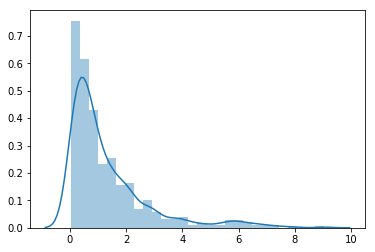

In [15]:
sns_plot = sns.distplot(st_events)
fig = sns_plot.get_figure()

In [16]:
def statistics_plot (data):
    df = pd.DataFrame({"col": data})

    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
    mean=df["col"].mean()
    median=df["col"].median()
    #mode=df["stalling events"].mode().get_values()[0]
    mode=df["col"].mode()[0]

    sns.boxplot(df, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode, color='b', linestyle='-')

    sns.distplot(df, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    ax_hist.axvline(mode, color='b', linestyle='-')

    plt.legend({'Mean':mean,'Median':median,'Mode':mode}, fontsize = 18)

    

    print ("mean:",mean, "median:", median,"mode:", mode)
    
    ax.tick_params(axis="x", labelsize=14)
    ax.tick_params(axis="y", labelsize=14)
    #ax.set_xlabel("MOS", fontsize=18)
    #ax.set_ylabel("Distribution", fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='minor', labelsize=8)
    ax_box.set(xlabel='')
    plt.show()

mean: 60.866948018124475 median: 62.2687466098366 mode: 11.684961984291197


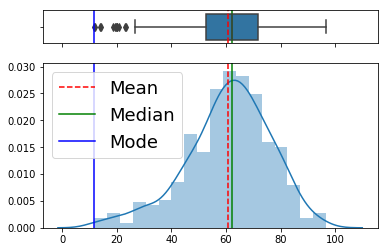

In [17]:
statistics_plot (full['MOS'])

mean: 1.323634188405796 median: 0.8 mode: 0.16667


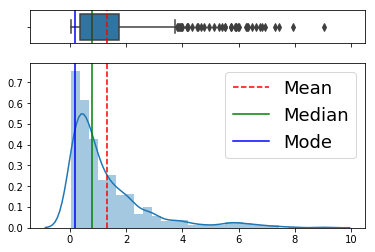

In [18]:
statistics_plot (st_events)

In [19]:
all_psnr = []

for index, row in full.iterrows():
    value = row['seqPSNR per frame']
    for i in range (0, len(value),1):
        all_psnr.append (value[i])

mean: 36.20173993328256 median: 36.2769 mode: 60.0


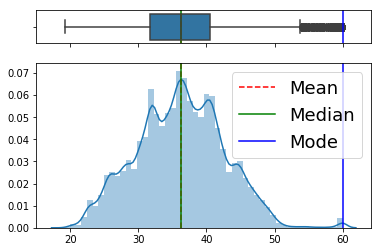

In [20]:
statistics_plot (all_psnr)

In [21]:
min (full['MOS'])

11.684961984291197

In [22]:
max (full['MOS'])

96.63354027003041

In [23]:


def mediana(items):
    if (type (items) == int):
        return items
    else:
        return statistics.median(map(float, items))
    

In [24]:
def mean(items):
    return statistics.mean(items)

In [25]:
def maximum(items):
    if (type (items) == int):
        return items
    else:
        return max(items)

In [26]:
full["st_events_median"] = np.nan
full["SwithcingMagnitide_median"] = np.nan
full["st_events_max"] = np.nan
full["SwithcingMagnitide_max"] = np.nan

full["median(PSNR)"] = np.nan

for index, row in full.iterrows():
    
    value = mediana(row['duration of stalling events in second'])
    full.at[index, 'st_events_median']= value
    
    value = maximum(row['duration of stalling events in second'])
    full.at[index, 'st_events_max'] = value
    
    value = mediana(row['SwithcingMagnitide'])
    full.at[index, 'SwithcingMagnitide_median']= value
        
    value = maximum(row['SwithcingMagnitide'])
    full.at[index, 'SwithcingMagnitide_max'] = value
    
    value = mediana(row['seqPSNR per frame'])
    full.at[index, 'median(PSNR)'] = value

In [27]:
full.head(1)

Name  FPS  stallTime  duration                     switching  \
0  BigBuckBunny   30     4.0333   14.0333  [false. false. false. false]   

  SwithcingMagnitide                             bitrates  \
0                  0  [222.0, 222.0, 222.0, 222.0, 222.0]   

                                   seqPSNR per frame  initial buffer time  \
0  [23.2066, 23.1989, 23.1793, 23.1564, 23.1283, ...                  1.8   

  duration of stalling events in second  ...  averageWeightedBitrate    SI  \
0            [0.73333, 1.0667, 0.43333]  ...                   222.0  96.0   

     TI    content       motion st_events_median SwithcingMagnitide_median  \
0  97.0  animation  high motion          0.73333                       0.0   

  st_events_max SwithcingMagnitide_max  median(PSNR)  
0        1.0667                    0.0      28.22065  

[1 rows x 29 columns]

In [28]:
#640x480_fps30_420_1050k - width/height/frameRate(fps)/?качество? - везде одинаковый параметер/DASH bitrate

def represent_parse(r1, r2, r3, r4, r5):
    width = []
    heigth = []
    dash_bitrate = []
    for r in [r1, r2, r3, r4, r5]:
        parse = re.findall(r'\d+', r)
        width.append (parse[0])
        heigth.append (parse[1])
        dash_bitrate.append (parse[4])
    return width, heigth, dash_bitrate

In [29]:
def list_to_float1 (value, separator = " "):
    #if value == np.nan:
    if str(value) == 'nan':
        return 0         
        
    #value = value.split(separator)
    #value = list(map(lambda x : x.replace('  ', ''), value))
    #value = list(map(lambda x : x.replace(' ', ''), value))
    #print (value) 
    value = list(map(lambda x : float(x), value))
    return value

In [30]:
full["width"] = np.nan
full["heigth"] = np.nan
full["dash_bitrate"] = np.nan


#full["median(width)"] = np.nan
#full["median(heigth)"] = np.nan
full["median(dash_bitrate)"] = np.nan

full["mean(width)"] = np.nan
full["mean(heigth)"] = np.nan

for index, row in full.iterrows():
    width, heigth, dash_bitrate, = represent_parse(row["Representation 1"], row["Representation 2"],
                                                   row["Representation 3"],
                       row["Representation 4"], row["Representation 5"])
    full['width'] = full['width'].astype(object)
    full['heigth'] = full['heigth'].astype(object)
    full['dash_bitrate'] = full['dash_bitrate'].astype(object)
    full.iat[index, full.columns.get_loc('width')] = width
    full.iat[index, full.columns.get_loc('heigth')] = heigth
    full.iat[index, full.columns.get_loc('dash_bitrate')] = dash_bitrate
    #full.iat[index, full.columns.get_loc('dash_bitrate')] = list_to_float( dash_bitrate)
    #full.at[index, 'width'] = width
    #full.at[index, 'heigth'] = heigth
    #full.at[index, 'dash_bitrate'] = dash_bitrate
    
    #full.at[index, 'median(width)'] = mediana (width)
    #full.at[index, 'median(heigth)'] = mediana (heigth)
    full.at[index, 'median(dash_bitrate)'] = mediana (dash_bitrate)
    
    #print (width)
    
    full.at[index, 'mean(width)'] = mean (list_to_float1 (width))
    full.at[index, 'mean(heigth)'] = mean (list_to_float1 (heigth))

In [31]:
print(spearmanr(full['MOS'], full['mean(width)']))

SpearmanrResult(correlation=0.5411586048408995, pvalue=1.3510073006092995e-35)


In [32]:
#print(spearmanr(full['MOS'], full['median(width)']))

In [33]:
def bitates_search (bitrates):
    diff = np.diff (bitrates)

    neg_list = []
    pos_list = []
    for i in diff:
        if i < 0:
            neg_list.append(i)
        elif i > 0:
            pos_list.append(i)
    
    if len (pos_list)!=0:
        maxpos = max(pos_list)
        medpos = mediana (pos_list)
        
        meanpos = mean (pos_list)
    else:
        maxpos = 0 #Вообще хороший вопрос, как правильно анализировать при отсутствии изменения качества
        medpos = 0
        
        meanpos = 0
    if len (neg_list)!=0:
        maxneg = min(neg_list)
        medneg = mediana (neg_list)
        
        meanneg = mean (neg_list)
    else:
        maxneg = 0 #Вообще хороший вопрос, как правильно анализировать при отсутствии изменения качества
        medneg = 0
        
        meanneg = 0
            
    return len (pos_list), len(neg_list), maxpos, medpos, maxneg, medneg, meanneg, meanpos

In [34]:
#Добавили признаки из битрейта, отдельно по переключениям вниз и вверх
full["bitrate_pos_changes_count"] = np.nan
full["bitrate_neg_changes_count"] = np.nan
full["bitrate_max_pos_change"] = np.nan
full["bitrate_max_neg_change"] = np.nan
#full["bitrate_med_pos_change"] = np.nan
#full["bitrate_med_neg_change"] = np.nan

full["bitrate_mean_pos_change"] = np.nan
full["bitrate_mean_neg_change"] = np.nan

for index, row in full.iterrows():
    pos_count, neg_count, maxpos, medpos, maxneg, medneg, meanneg, meanpos = bitates_search(row['bitrates'])
    
    full.at[index, 'bitrate_pos_changes_count'] = pos_count
    full.at[index, 'bitrate_neg_changes_count'] = neg_count
    full.at[index, 'bitrate_max_pos_change'] = maxpos
    full.at[index, 'bitrate_max_neg_change'] = maxneg
    #full.at[index, 'bitrate_med_pos_change'] = medpos
    #full.at[index, 'bitrate_med_neg_change'] = medneg
    
    full.at[index, 'bitrate_mean_pos_change'] = meanpos
    full.at[index, 'bitrate_mean_neg_change'] = meanneg

In [35]:
#print(spearmanr(full['MOS'], full['bitrate_med_neg_change']))

In [36]:
print(spearmanr(full['MOS'], full['bitrate_mean_neg_change']))

SpearmanrResult(correlation=0.16719319240251546, pvalue=0.0003681222999718926)


In [37]:
#Формирование признаков
#1. switching 1.1 Количество переключений
def number_of_sw (switching):
    return  switching.count('true')

#2. Частота переключений
def freq_of_sw (switching, duration):
    #print (switching)
    #print (duration)
    return  switching/duration

#2. Частота возникновения событий замираний
def freq_of_st (stalling_events, duration):
    #print (switching)
    #print (duration)
    return  stalling_events/duration

#может быть 2^4 варианта характера переключений
def type_of_sw (column_value):
    unit_to_multiplier = {
    '[false. false. false. false]': 0,
    '[false. false. false. true]': 1,
    '[false. false. true. false]': 2,
    '[false. false. true. true]': 3,
    '[false. true. false. false]': 4,
    '[false. true. false. true]': 5,
    '[false. true. true. false]': 6,
    '[false. true. true. true]': 7,
    '[true. false. false. false]': 8,
    '[true. false. false. true]': 9,
    '[true. false. true. false]': 10,
    '[true. false. true. true]': 11,
    '[true. true. false. false]': 12,
    '[true. true. false. true]': 13,
    '[true. true. true. false]': 14,
    '[true. true. true. true]': 15,
    }
    return unit_to_multiplier.get(column_value, 16) #0 - Значение по умолчанию

In [38]:
#Добавление Частоты переключений и типа переключения
full["freq_of_st"] = np.nan
full["sw_type"] = np.nan
full["Bitrate switch count"] = np.nan
full["freq_of_sw"] = np.nan

for index, row in full.iterrows():
    value = freq_of_st(row['Rebuffer count'], row['duration'])
    full.at[index, 'freq_of_st'] = value
    
    value = type_of_sw(row['switching'])
    full.at[index, 'sw_type'] = value
    
    value = number_of_sw(row['switching'])
    full.at[index, 'Bitrate switch count'] = value
    
    value = freq_of_st(number_of_sw(row['switching']), row['duration'])
    full.at[index, 'freq_of_sw'] = value

In [39]:
full["median(bitrates)"] = np.nan

for index, row in full.iterrows():
    value = mediana(row['bitrates'])
    full.at[index, 'median(bitrates)'] = value

## Добавление признаков из статьи 

In [40]:
#Rebuffer percentage
full["Rebuffer percentage"] = np.nan

for index, row in full.iterrows():
    #value = row['stallTime']/ row['duration']
    value = (row['stallTime'] -row['initial buffer time'])/ (row['duration'] -row['initial buffer time'])
    full.at[index, 'Rebuffer percentage'] = value

In [41]:
print(spearmanr(full['MOS'], full['Rebuffer percentage']))
print (round (spearmanr(full['MOS'], full['Rebuffer percentage'])[1], 10))

SpearmanrResult(correlation=-0.27325064979898134, pvalue=3.794375770804499e-09)
3.8e-09


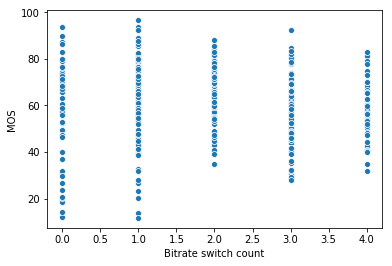

In [42]:
ax = sns.scatterplot(y="MOS", x="Bitrate switch count", ci=None, data=full)

In [43]:
def dash_change_count(dash):
    sum_index = 0
    for i in range(0, len(dash) - 1):
        if int(dash[i]) != int(dash[i + 1]):   
            sum_index += 1
    return sum_index

In [44]:
full["dash_change_count"] = np.nan

for index, row in full.iterrows():
    #value = row['stallTime']/ row['duration']
    value = dash_change_count(row['dash_bitrate'])
    #value = dash_change_count(row['bitrates'])
    full.at[index, 'dash_change_count'] = value
    
print(spearmanr(full['MOS'], full['dash_change_count']))

SpearmanrResult(correlation=-0.15831872755799564, pvalue=0.0007506284806592724)


In [45]:
print(spearmanr(full['MOS'], full['dash_change_count']))

SpearmanrResult(correlation=-0.15831872755799564, pvalue=0.0007506284806592724)


In [46]:
#Так дано в статье
def averageAbsBitrateSwithcing (bitrates, switching):
    if (bitrates == 0):
        return 0
    #if (bitrates == NaN)
    diff = np.diff (bitrates)
    #number = number_of_sw(switching)
    if (sum(abs(diff))==0):
        return 0
    
    absw = sum (abs(diff))/switching  
    #print (absw)
    return absw

In [47]:
#Так дано в статье
def averageBitrateSwithcing_relative(bitrates, switching):
    if (bitrates == 0):
        return 0
    #if (bitrates == NaN)
    diff = np.diff (bitrates)
    #number = number_of_sw(switching)
    if (sum(abs(diff))==0):
        return 0
    absw = 0
    #for i in [1, 2, 3, 4]:
     #   tmp = (bitrates[i]-bitrates[i-1])/i
    #    absw = absw + abs(tmp)
    absw = sum ((diff))/switching  
    #print (absw)
    return absw

In [48]:
full["Average Bitrate Swithcing magnitude"] = np.nan

for index, row in full.iterrows():
    value = averageAbsBitrateSwithcing(row['bitrates'], row['Bitrate switch count'])
    full.at[index, 'Average Bitrate Swithcing magnitude'] = value

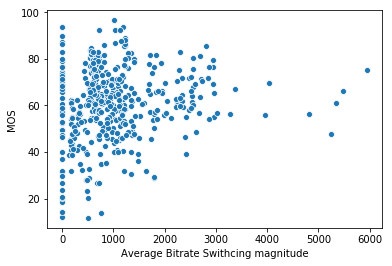

In [49]:
ax = sns.scatterplot(y="MOS", x="Average Bitrate Swithcing magnitude", ci=None, data=full)

In [50]:
print(spearmanr(full['MOS'], full['Average Bitrate Swithcing magnitude']))

SpearmanrResult(correlation=0.10822992887052169, pvalue=0.02166063964763299)


SpearmanrResult(correlation=0.1333803792919883, pvalue=0.004593634315815448)


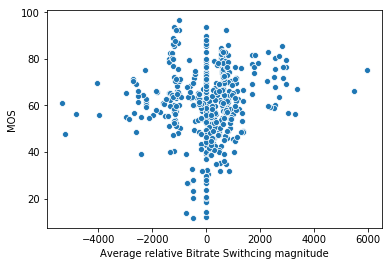

In [51]:
full["Average relative Bitrate Swithcing magnitude"] = np.nan

for index, row in full.iterrows():
    value = averageBitrateSwithcing_relative(row['bitrates'], row['Bitrate switch count'])
    full.at[index, 'Average relative Bitrate Swithcing magnitude'] = value
ax = sns.scatterplot(y="MOS", x="Average relative Bitrate Swithcing magnitude", ci=None, data=full)
print(spearmanr(full['MOS'], full['Average relative Bitrate Swithcing magnitude']))

In [52]:
bitrates = full["bitrates"][29]
bitrates

[974.0, 3774.0, 3774.0, 3774.0, 3774.0]

In [53]:

max_bitrate = max (bitrates)
max_bitrate

3774.0

In [54]:
bitrates.count(max_bitrate)

4

In [55]:
def Ph(bitrates, duration, inbuf):
    max_bitrate = max (bitrates)
    highest_quality_dutarion = bitrates.count(max_bitrate)
    
    #ph = 2*highest_quality_dutarion / (duration)
    ph = 2*highest_quality_dutarion / (duration-inbuf)
    
    return ph

SpearmanrResult(correlation=0.17757416164459214, pvalue=0.0001527381644023074)


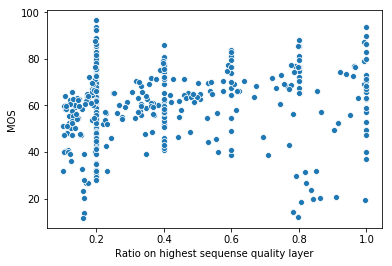

In [56]:
full["Ratio on highest sequense quality layer"] = np.nan
for index, row in full.iterrows():
    #value = Ph(row['bitrates'], row['duration'], row['initial buffer time'])
    value = Ph(row['bitrates'], row['duration'], row['initial buffer time'])
    full.at[index, 'Ratio on highest sequense quality layer'] = value

ax = sns.scatterplot(y="MOS", x="Ratio on highest sequense quality layer", ci=None, data=full)
print(spearmanr(full['MOS'], full['Ratio on highest sequense quality layer']))

In [57]:
def Ph_min(bitrates, duration, inbuf):
    min_bitrate = min (bitrates)
    min_quality_dutarion = bitrates.count(min_bitrate)
    
    #ph = 2*highest_quality_dutarion / (duration)
    ph = 2*min_quality_dutarion / (duration-inbuf)
    
    return ph

SpearmanrResult(correlation=-0.008188241824241254, pvalue=0.8624795812029498)


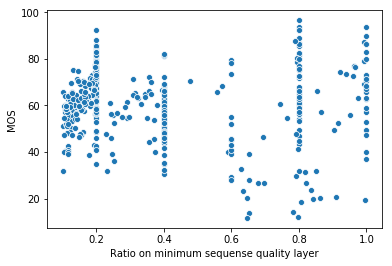

In [58]:
full["Ratio on minimum sequense quality layer"] = np.nan
for index, row in full.iterrows():
    #value = Ph(row['bitrates'], row['duration'], row['initial buffer time'])
    value = Ph_min(row['bitrates'], row['duration'], row['initial buffer time'])
    full.at[index, 'Ratio on minimum sequense quality layer'] = value

ax = sns.scatterplot(y="MOS", x="Ratio on minimum sequense quality layer", ci=None, data=full)
print(spearmanr(full['MOS'], full['Ratio on minimum sequense quality layer']))

In [59]:
a = full['dash_bitrate'][30]

In [60]:
max_bitrate =  ([int(item) for item in a])

In [61]:
max_bitrate

[1050, 4300, 5800, 4300, 4300]

SpearmanrResult(correlation=0.7586086365859753, pvalue=2.2024195942558703e-85)


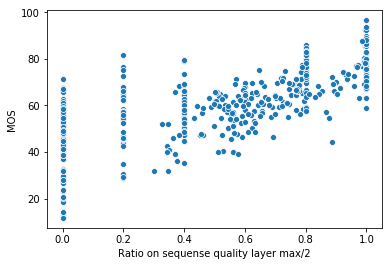

In [62]:
def Ph_dash_2(bitrates, duration, inbuf):
    bitrates = [int(item) for item in bitrates]
    max_bitrate = max (bitrates)
    hqd6 = bitrates.count(1750)
    hqd7 = bitrates.count(2350)
    hqd8 = bitrates.count(3000)
    hqd9 = bitrates.count(4300)
    hqd10 = bitrates.count(5800)
    hqd11 = bitrates.count(7000)
    
    hqd = hqd6 + hqd7 + hqd8 + hqd9 + hqd10 + hqd11
    
    #ph = 2*highest_quality_dutarion / (duration)
    ph = 2*hqd / (duration-inbuf)
    
    return ph

full["Ratio on sequense quality layer max/2"] = np.nan
for index, row in full.iterrows():
    #value = Ph(row['bitrates'], row['duration'], row['initial buffer time'])
    value = Ph_dash_2(row['dash_bitrate'], row['duration'], row['initial buffer time'])
    full.at[index, 'Ratio on sequense quality layer max/2'] = value

ax = sns.scatterplot(y="MOS", x="Ratio on sequense quality layer max/2", ci=None, data=full)
print(spearmanr(full['MOS'], full['Ratio on sequense quality layer max/2']))

SpearmanrResult(correlation=-0.17122847220619397, pvalue=0.0002630715854593449)


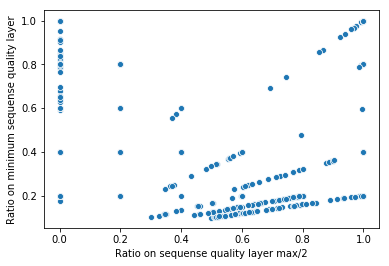

In [63]:
ax = sns.scatterplot(x="Ratio on sequense quality layer max/2", y="Ratio on minimum sequense quality layer", ci=None, data=full)
print(spearmanr(full['Ratio on minimum sequense quality layer'], full['Ratio on sequense quality layer max/2']))

In [64]:
count=0



for index, row in full.iterrows():
    value = (row['bitrates'])
    
    if (sum(abs(np.diff(value)))==0):
        count += 1
count

54

In [65]:
count=0
const_bitrates=[]
mos_const_bitrates = []
for index, row in full.iterrows():
    bitrates = [int(item) for item in row['dash_bitrate']]
    #value = (row['dash_bitrate'])
    
    if (sum(abs(np.diff(bitrates)))==0):
        count += 1
        const_bitrates.append (bitrates[0])
        mos_const_bitrates.append (row['MOS'])
count

54

SpearmanrResult(correlation=0.8557424141365629, pvalue=1.681430171097886e-16)


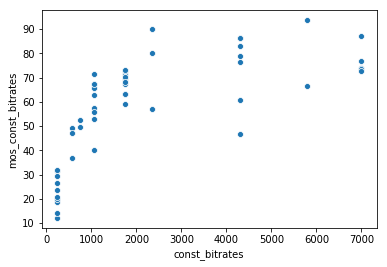

In [66]:
data_tuples = list(zip(const_bitrates,mos_const_bitrates))
test = pd.DataFrame(data_tuples, columns=['const_bitrates','mos_const_bitrates'])

#print (test)

ax = sns.scatterplot(x= "const_bitrates", y= "mos_const_bitrates", ci="sd", data = test)
print(spearmanr(const_bitrates, mos_const_bitrates))

In [67]:
full["Constant_bitrate"] = 0
for index, row in full.iterrows():
    bitrates = [int(item) for item in row['dash_bitrate']]
    #value = (row['dash_bitrate'])
    
    if (sum(abs(np.diff(bitrates)))==0):
        full.at[index, 'Constant_bitrate'] = 1



In [68]:
dash_list = [235, 375, 560, 750, 1050, 1750,2350,3000,4300,5800,7000]

In [69]:
def maxRatio (bitrates, level, duration, inbuf):
    bitrates = [int(item) for item in bitrates]
    max_bitrate = max (bitrates)
    #highest_quality_dutarion = bitrates.count(max_bitrate)
    highest_quality_dutarion = bitrates.count((level))
    #ph = 2*highest_quality_dutarion / (duration)
    ph = 2*highest_quality_dutarion / (duration-inbuf)
    return ph

SpearmanrResult(correlation=0.11714824112078281, pvalue=0.012891760630344676)


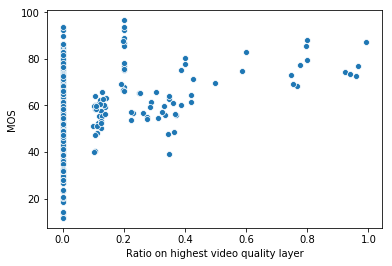

In [70]:
full["Ratio on highest video quality layer"] = np.nan

for index, row in full.iterrows():
    value = maxRatio(row['dash_bitrate'], 7000, row['duration'], row['initial buffer time'])
    full.at[index, 'Ratio on highest video quality layer'] = value
ax = sns.scatterplot(y="MOS", x="Ratio on highest video quality layer", ci=None, data=full)
print(spearmanr(full['MOS'], full['Ratio on highest video quality layer']))

In [71]:
full["Ratio on video quality layers_tests"] = np.nan

spearman_dash_levels = []
for level in dash_list:
    for index, row in full.iterrows():
        value = maxRatio(row['dash_bitrate'], level, row['duration'], row['initial buffer time'])
        full.at[index, 'Ratio on video quality layers_tests'] = value
    sp = spearmanr(full['MOS'], full['Ratio on video quality layers_tests'])
    spearman_dash_levels.append([sp[0], sp[1],level])
                   
    #print(spearmanr(full['MOS'], full['Ratio on maximum video quality']))

In [72]:
#spearman_dash_levels=np.array(spearman_dash_levels)  
for i in range (len(spearman_dash_levels)):
    print (round(spearman_dash_levels[i][0], 4))


-0.4895
-0.3064
-0.3565
-0.1996
-0.028
0.1889
0.1927
0.1953
0.2
0.1562
0.1171


In [73]:
spearman_dash_levels = np.array(spearman_dash_levels)
spearman_dash_levels[:,2]

array([ 235.,  375.,  560.,  750., 1050., 1750., 2350., 3000., 4300.,
       5800., 7000.])

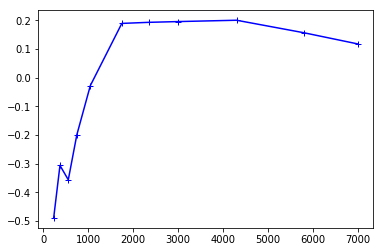

In [74]:
fig, ax = plt.subplots()
x = list(spearman_dash_levels[:,2])
y = spearman_dash_levels[:,0]
ax.plot(x, y, 'b+', linestyle='solid')
plt.show()

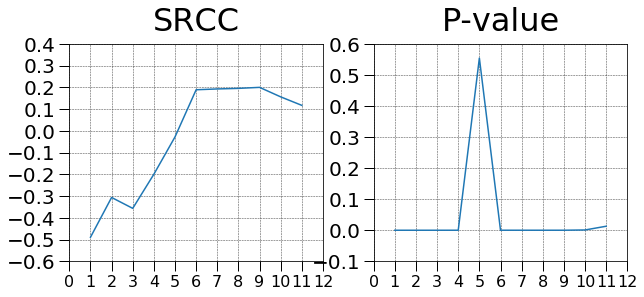

In [75]:
# First create some toy data:
x = np.arange(1, 12, 1)

#plt.style.use('grayscale')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False,figsize=(10, 4))
ax1.plot(x, spearman_dash_levels[:,0])
#ax1.set_title('SRCC')
#ax2.set_title('p-value')



ax1.set_title("SRCC", fontsize=32, verticalalignment='bottom')
ax2.set_title("P-value", fontsize=32, verticalalignment='bottom')

ax1.xaxis.set_major_locator(MultipleLocator(1.000))
ax1.xaxis.set_minor_locator(AutoMinorLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(.1000))
ax1.yaxis.set_minor_locator(AutoMinorLocator(1))
ax1.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax1.set_xlim(0, 12)
ax1.set_ylim(-0.6, 0.4)

ax1.tick_params(which='major', width=1.0)
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', width=1.0, labelsize=10)
ax1.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

#plt.imshow(cmap="Greys")

ax1.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)


ax2.xaxis.set_major_locator(MultipleLocator(1.000))
ax2.xaxis.set_minor_locator(AutoMinorLocator(1))
ax2.yaxis.set_major_locator(MultipleLocator(.1000))
ax2.yaxis.set_minor_locator(AutoMinorLocator(1))
ax2.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=20)

ax2.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="y", labelsize=20)

ax2.set_xlim(0, 12)
ax2.set_ylim(-0.1, 0.6)

ax2.tick_params(which='major', width=1.0)
ax2.tick_params(which='major', length=10)
ax2.tick_params(which='minor', width=1.0, labelsize=10)
ax2.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax2.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

#ax1.plot(X, Y, linewidth=0,
 #       marker='o', markerfacecolor='w', markeredgecolor='k')

#ax.set_title("Spatio-Temporal complexity space", fontsize=20, verticalalignment='bottom')
#ax.set_xlabel("Temporal information")
#ax.set_ylabel("Spatial informationl")


ax2.plot(x, spearman_dash_levels[:,1])

SpearmanrResult(correlation=-0.48948440978445024, pvalue=1.7273580473961437e-28)


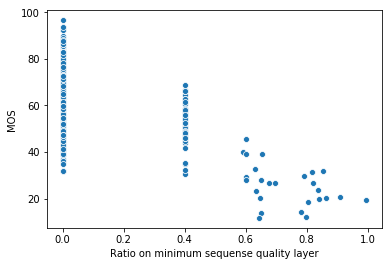

In [76]:
full["Ratio on minimum sequense quality layer"] = np.nan
for index, row in full.iterrows():
    #value = Ph(row['bitrates'], row['duration'], row['initial buffer time'])
    value = maxRatio(row['dash_bitrate'], 235, row['duration'], row['initial buffer time'])
    full.at[index, 'Ratio on minimum sequense quality layer'] = value

ax = sns.scatterplot(y="MOS", x="Ratio on minimum sequense quality layer", ci=None, data=full)
print(spearmanr(full['MOS'], full['Ratio on minimum sequense quality layer']))

## Сборка таблицы для анализа 

In [77]:
full.columns

Index(['Name', 'FPS', 'stallTime', 'duration', 'switching',
       'SwithcingMagnitide', 'bitrates', 'seqPSNR per frame',
       'initial buffer time', 'duration of stalling events in second',
       'Rebuffer count', 'average duration of stalling event', 'mean(seqPSNR)',
       'MOS', 'Representation 1', 'Representation 2', 'Representation 3',
       'Representation 4', 'Representation 5', 'averageWeightedBitrate', 'SI',
       'TI', 'content', 'motion', 'st_events_median',
       'SwithcingMagnitide_median', 'st_events_max', 'SwithcingMagnitide_max',
       'median(PSNR)', 'width', 'heigth', 'dash_bitrate',
       'median(dash_bitrate)', 'mean(width)', 'mean(heigth)',
       'bitrate_pos_changes_count', 'bitrate_neg_changes_count',
       'bitrate_max_pos_change', 'bitrate_max_neg_change',
       'bitrate_mean_pos_change', 'bitrate_mean_neg_change', 'freq_of_st',
       'sw_type', 'Bitrate switch count', 'freq_of_sw', 'median(bitrates)',
       'Rebuffer percentage', 'dash_change_cou

In [78]:
#Смотрим, что у нас есть mean (PSNR). А давайте посмотрим на статистики по PSNR

In [79]:
# calculate spearman's correlation
#начение p для интерпретации значимости коэффициента. Чем больше p, выше значимость (некорреллируемость)

coef, p = spearmanr(full['mean(seqPSNR)'], full['median(PSNR)'])

data = full.copy()

In [80]:
data = data.drop('Representation 1', axis = 1)
data = data.drop('Representation 2', axis = 1)
data = data.drop('Representation 3', axis = 1)
data = data.drop('Representation 4', axis = 1)
data = data.drop('Representation 5', axis = 1)

data = data.drop('Name', axis = 1)
data = data.drop('FPS', axis = 1)
data = data.drop('switching', axis = 1)
data = data.drop('SwithcingMagnitide', axis = 1)
data = data.drop('bitrates', axis = 1)

data = data.drop('seqPSNR per frame', axis = 1)
data = data.drop('duration of stalling events in second', axis = 1)

data = data.drop('SwithcingMagnitide_median', axis = 1)#Потому что я не понимаю, что это
data = data.drop('SwithcingMagnitide_max', axis = 1)#Потому что я не понимаю, что это

data = data.drop('width', axis = 1)
data = data.drop('heigth', axis = 1)
data = data.drop('dash_bitrate', axis = 1)

data = data.drop('sw_type', axis = 1)

data = data.drop('Ratio on video quality layers_tests', axis = 1)

In [81]:
cols = data.columns
cols = [cols [6]] + [cols [:6]] + [cols [7:]]
#data = data.ix[:, cols]
#data = data[cols]
mos = data['MOS']
data.drop(labels=['MOS'], axis=1,inplace = True)
data.insert(0, 'MOS', mos)

#data.reindex([2, 1], axis=1)

Below I have changed Spearman Rank Correlation coefficient (SRCC) to Kendall because it more accurate in terms of Average Variation and more robust.
But, se still using SRCC in case of comparison with other papers

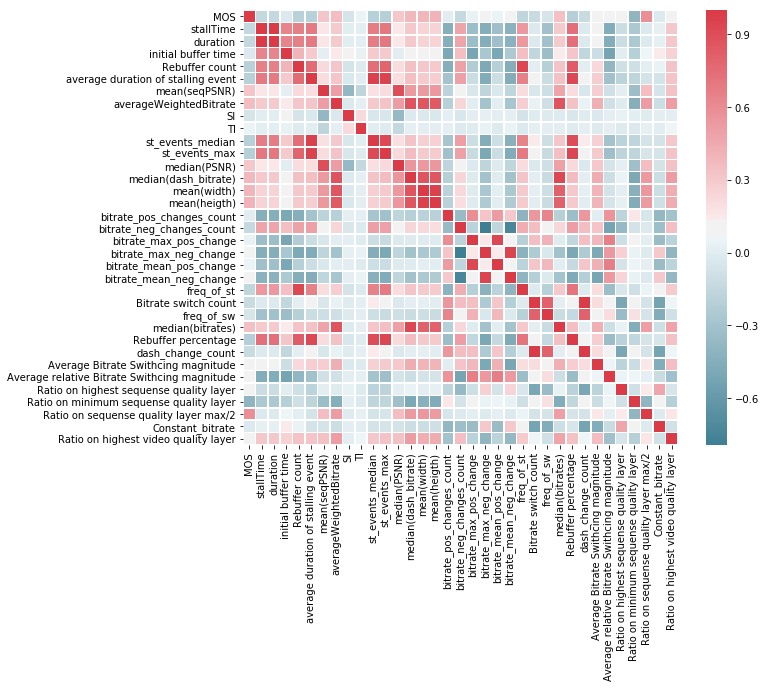

In [82]:
f, ax = plt.subplots(figsize=(10, 8))
#corr = data.corr(method="spearman")
corr = data.corr(method="kendall")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, linewidths=.5)

In [116]:
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormap

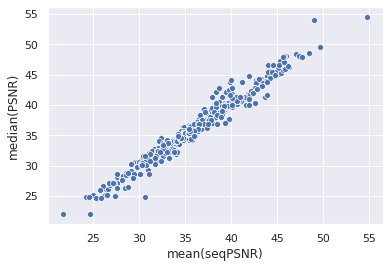

In [117]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="mean(seqPSNR)", y="median(PSNR)", ci=None, data=data)

In [118]:
print(spearmanr(full['MOS'], full['mean(seqPSNR)']))
print(spearmanr(full['MOS'], full['median(PSNR)']))
print(kendalltau(full['MOS'], full['mean(seqPSNR)']))
print(kendalltau(full['MOS'], full['median(PSNR)']))

SpearmanrResult(correlation=0.4605696129707933, pvalue=5.197174527829186e-25)
SpearmanrResult(correlation=0.4584182988053739, pvalue=9.15303807725632e-25)
KendalltauResult(correlation=0.3157076752829798, pvalue=1.4329786849029477e-23)
KendalltauResult(correlation=0.31307204319452325, pvalue=3.4975533679087155e-23)


In [119]:
data = data.drop('median(PSNR)', axis = 1)

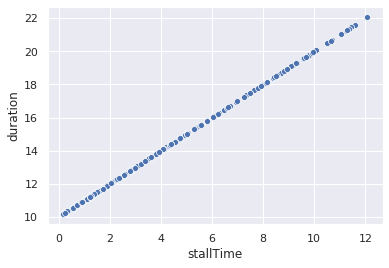

In [120]:
ax = sns.scatterplot(x="stallTime", y="duration", ci=None, data=data)

In [121]:
data = data.drop('duration', axis = 1)

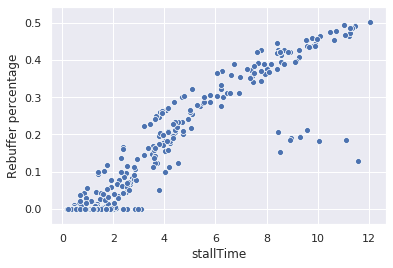

In [122]:
ax = sns.scatterplot(x="stallTime", y="Rebuffer percentage", ci=None, data=data)

In [123]:
print(pearsonr(full['stallTime'], full['Rebuffer percentage']))

(0.9378755312561984, 4.5250201183082085e-208)


In [124]:
print("Sp MOS vs stallTime", spearmanr(full['MOS'], full['stallTime']))
print("Sp MOS vs Rebuffer percentage",spearmanr(full['MOS'], full['Rebuffer percentage']))
print("Ken MOS vs stallTime", kendalltau(full['MOS'], full['stallTime']))
print("Ken MOS vs Rebuffer percentage",kendalltau(full['MOS'], full['Rebuffer percentage']))

Sp MOS vs stallTime SpearmanrResult(correlation=-0.20124679789462296, pvalue=1.697985539817566e-05)
Sp MOS vs Rebuffer percentage SpearmanrResult(correlation=-0.27325064979898134, pvalue=3.794375770804499e-09)
Ken MOS vs stallTime KendalltauResult(correlation=-0.1457147198774841, pvalue=4.114137829849412e-06)
Ken MOS vs Rebuffer percentage KendalltauResult(correlation=-0.21353146136334783, pvalue=3.7059899570408545e-10)


In [125]:
data = data.drop('stallTime', axis = 1)

In [126]:
#Выведем корреляцию и p-value для признаков и их попарных комбинаций

In [127]:
corr['MOS'].sort_values(ascending=False )

MOS                                             1.000000
Ratio on sequense quality layer max/2           0.758609
mean(heigth)                                    0.558450
mean(width)                                     0.541159
averageWeightedBitrate                          0.511754
median(dash_bitrate)                            0.508260
median(bitrates)                                0.481514
mean(seqPSNR)                                   0.460570
median(PSNR)                                    0.458418
Ratio on highest sequense quality layer         0.177574
bitrate_max_neg_change                          0.177276
bitrate_mean_neg_change                         0.167193
Average relative Bitrate Swithcing magnitude    0.133380
Ratio on highest video quality layer            0.117148
Average Bitrate Swithcing magnitude             0.108230
bitrate_mean_pos_change                         0.072694
TI                                              0.069718
bitrate_max_pos_change         

In [128]:
len (data.columns)

34

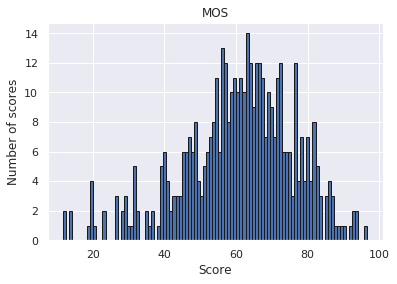

In [129]:
# Histogram of MOS
#plt.style.use('fivethirtyeight')
plt.hist(data['MOS'], bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of scores');
plt.title('MOS');

mean: 60.866948018124475 median: 62.2687466098366 mode: 11.684961984291197


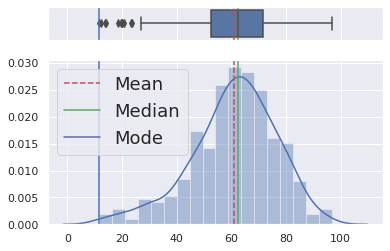

In [130]:
statistics_plot (data['MOS'])

In [131]:
types = data['motion'].copy()
print (types)
#X = np.stack([np.ones(m), X], axis=1)

0      high motion
1      high motion
2      high motion
3      high motion
4      high motion
          ...     
445    high motion
446    high motion
447    high motion
448    high motion
449    high motion
Name: motion, Length: 450, dtype: object


In [132]:
types = types.value_counts()
print (types)
types = list(types.index)

print (types)

smooth motion     190
high motion       128
average motion     92
static             30
camera motion      10
Name: motion, dtype: int64
['smooth motion', 'high motion', 'average motion', 'static', 'camera motion']


In [133]:
types = data.dropna(subset=['MOS'])
types = types['motion'].value_counts()
types = list(types.index)

In [1358]:
# Plot of distribution of scores for building categories
figsize(8, 6)

# Plot each building
for b_type in types:
    # Select the building type
    subset = full[full['motion'] == b_type]
    
    #print (subset)
    
    # Density plot
    ax = sns.kdeplot(subset['MOS'],
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('MOS', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of MOS by Motion', size = 28);
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text

TypeError: 'tuple' object is not callable

[None, None, None, None, None, None, None, None, None, None]

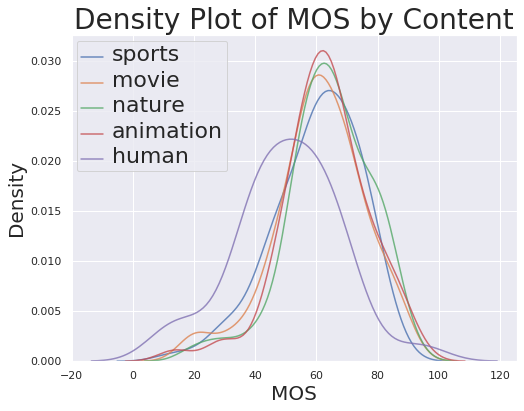

In [958]:
types = data.dropna(subset=['MOS'])
types = types['content'].value_counts()
types = list(types.index)
figsize(8, 6)
for b_type in types[0:5]:
    # Select the building type
    subset = data[data['content'] == b_type]
    
    #print (subset)
    
    # Density plot
    ax = sns.kdeplot(subset['MOS'],
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('MOS', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of MOS by Content', size = 28);
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text


[None, None, None, None, None, None, None, None, None, None, None, None]

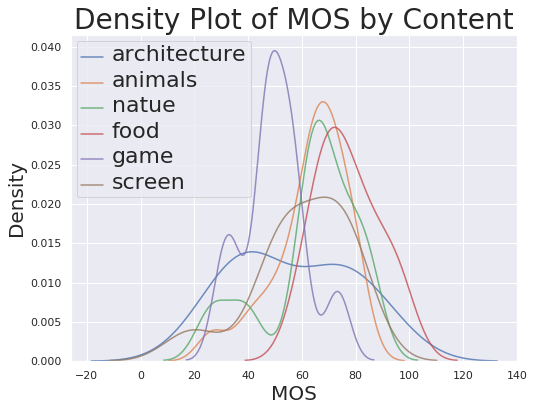

In [959]:
figsize(8, 6)

for b_type in types[5:]:
    # Select the building type
    subset = data[data['content'] == b_type]
    
    #print (subset)
    
    # Density plot
    ax = sns.kdeplot(subset['MOS'],
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('MOS', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of MOS by Content', size = 28);
plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text

In [960]:
feature_analyis = data.copy()
feature_analyis = feature_analyis.drop('content', axis = 1)
feature_analyis = feature_analyis.drop('motion', axis = 1)
feature_analyis = feature_analyis.drop('MOS', axis = 1)

feature_analyis = feature_analyis.drop('SI', axis = 1)
feature_analyis = feature_analyis.drop('TI', axis = 1)

In [961]:
feature_analyis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 32 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   stallTime                                     450 non-null    float64
 1   duration                                      450 non-null    float64
 2   initial buffer time                           450 non-null    float64
 3   Rebuffer count                                450 non-null    int64  
 4   average duration of stalling event            450 non-null    float64
 5   mean(seqPSNR)                                 450 non-null    float64
 6   averageWeightedBitrate                        450 non-null    float64
 7   st_events_median                              450 non-null    float64
 8   st_events_max                                 450 non-null    float64
 9   median(PSNR)                                  450 non-null    flo

In [962]:

#l1 = list(combinations_with_replacement(data_analyis.columns, 2))
feature_combs_2 = list(combinations(feature_analyis.columns, 2))

In [963]:
sp_list=[]
for l in range(len(feature_combs_2)):
    sp = pearsonr (feature_analyis[feature_combs_2[l][0]],feature_analyis[feature_combs_2[l][1]])
    sp_list.append ([sp[0], sp[1],feature_combs_2[l]])
    
sp_list.sort(key=lambda x: x[0])
sp_list[-28:-1]

[[0.8276752525902609, 1.8408266906673593e-114, ('stallTime', 'st_events_max')],
 [0.8276753224593145, 1.8406751204509285e-114, ('duration', 'st_events_max')],
 [0.8466974779937562,
  7.649668421552412e-125,
  ('st_events_median', 'Rebuffer percentage')],
 [0.8828604936874836,
  3.7906809264935237e-149,
  ('average duration of stalling event', 'Rebuffer percentage')],
 [0.89902793212772,
  8.998289846903277e-163,
  ('st_events_median', 'st_events_max')],
 [0.9119325189691375,
  2.015779064229795e-175,
  ('st_events_max', 'Rebuffer percentage')],
 [0.9149374615535814,
  1.19811067261512e-178,
  ('Bitrate switch count', 'freq_of_sw')],
 [0.9149374615535814,
  1.19811067261512e-178,
  ('freq_of_sw', 'dash_change_count')],
 [0.9180586377395399,
  3.9699212122203406e-182,
  ('mean(width)', 'median(bitrates)')],
 [0.918965972951461,
  3.640437982723929e-183,
  ('mean(heigth)', 'median(bitrates)')],
 [0.9283019044397188,
  1.3216864175742362e-194,
  ('median(dash_bitrate)', 'mean(width)')],
 [

In [964]:
feature_analyis.columns

Index(['stallTime', 'duration', 'initial buffer time', 'Rebuffer count',
       'average duration of stalling event', 'mean(seqPSNR)',
       'averageWeightedBitrate', 'st_events_median', 'st_events_max',
       'median(PSNR)', 'median(dash_bitrate)', 'mean(width)', 'mean(heigth)',
       'bitrate_pos_changes_count', 'bitrate_neg_changes_count',
       'bitrate_max_pos_change', 'bitrate_max_neg_change',
       'bitrate_mean_pos_change', 'bitrate_mean_neg_change', 'freq_of_st',
       'Bitrate switch count', 'freq_of_sw', 'median(bitrates)',
       'Rebuffer percentage', 'dash_change_count',
       'Average Bitrate Swithcing magnitude',
       'Average relative Bitrate Swithcing magnitude',
       'Ratio on highest sequense quality layer',
       'Ratio on minimum sequense quality layer',
       'Ratio on sequense quality layer max/2', 'Constant_bitrate',
       'Ratio on highest video quality layer'],
      dtype='object')

In [965]:
cols1 = ["average duration of stalling event"  ,
"st_events_median",
"freq_of_st",
"Rebuffer percentage"]

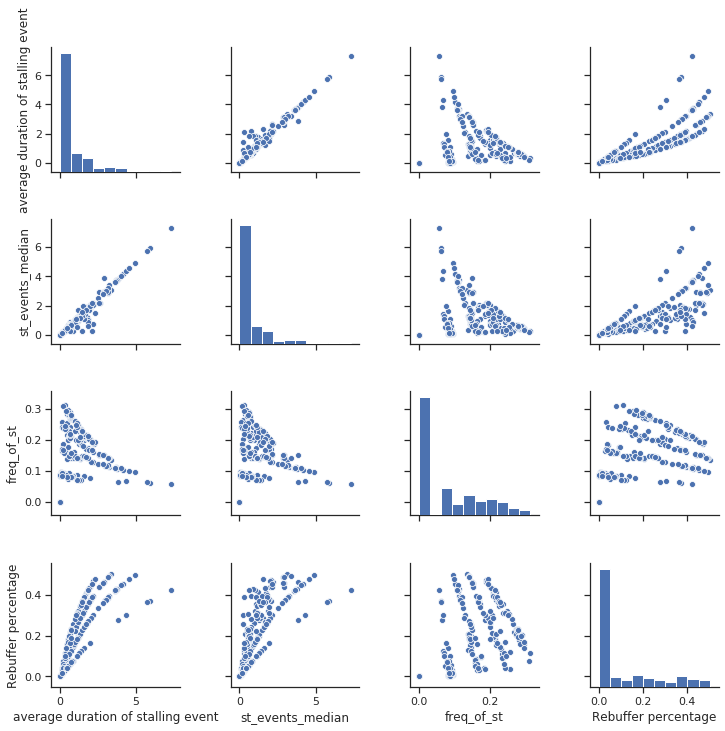

In [966]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(feature_analyis[cols1])


In [967]:
print(spearmanr(feature_analyis['st_events_median'], feature_analyis['average duration of stalling event']))
print("Sp MOS vs st_events_median", spearmanr(full['MOS'], feature_analyis['st_events_median']))
print("Sp MOS vs average duration of stalling event",spearmanr(full['MOS'], feature_analyis['average duration of stalling event']))
print("Ken MOS vs st_events_median", kendalltau(full['MOS'], full['st_events_median']))
print("Ken MOS vs average duration of stalling event",kendalltau(full['MOS'], feature_analyis['average duration of stalling event']))

SpearmanrResult(correlation=0.9939712659152998, pvalue=0.0)
Sp MOS vs st_events_median SpearmanrResult(correlation=-0.25788642443746074, pvalue=2.8644860793989565e-08)
Sp MOS vs average duration of stalling event SpearmanrResult(correlation=-0.26153710588197493, pvalue=1.7925831097875038e-08)
Ken MOS vs st_events_median KendalltauResult(correlation=-0.19994995310040575, pvalue=4.500243695544964e-09)
Ken MOS vs average duration of stalling event KendalltauResult(correlation=-0.20488908936746353, pvalue=1.8506215711850385e-09)


In [968]:
feature_analyis = feature_analyis.drop('st_events_median', axis = 1)

In [969]:
cols2 = ["median(dash_bitrate)",
"averageWeightedBitrate",
"median(bitrates)",
"Average Bitrate Swithcing magnitude",
"Ratio on highest video quality layer"]

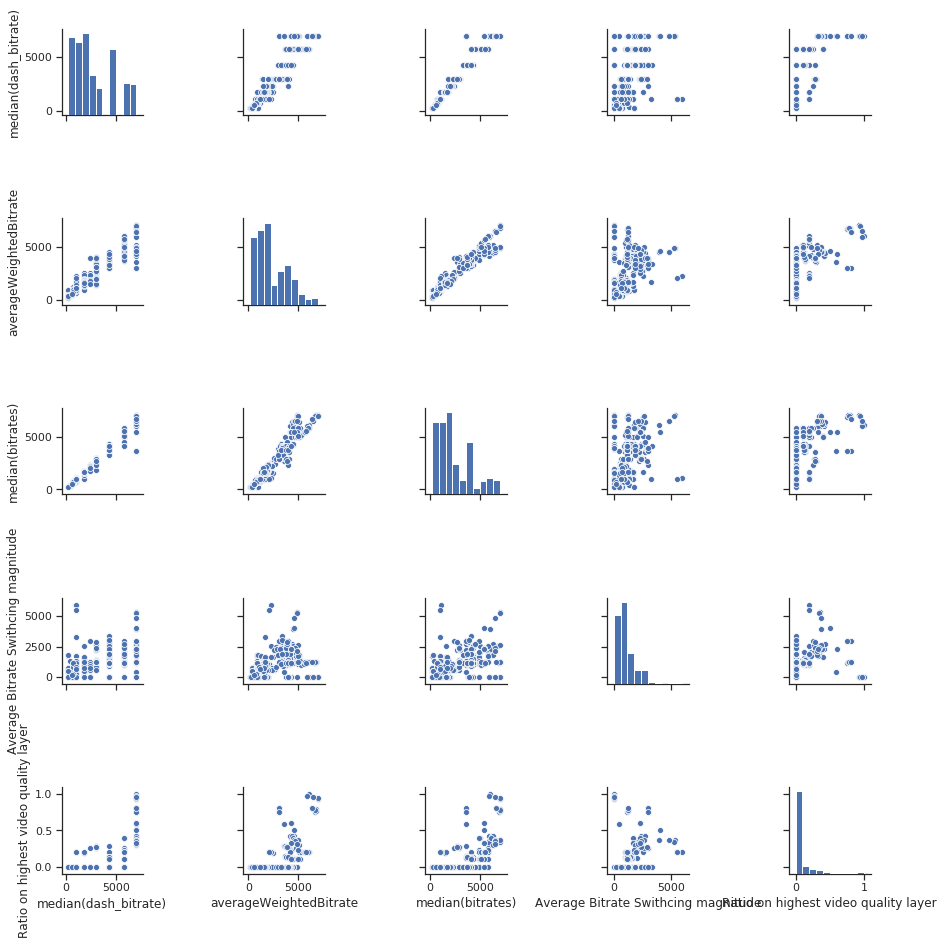

In [970]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(feature_analyis[cols2])

In [829]:
print(spearmanr(feature_analyis['averageWeightedBitrate'], feature_analyis['median(bitrates)']))
print("Sp MOS vs averageWeightedBitrate", spearmanr(full['MOS'], feature_analyis['averageWeightedBitrate']))
print("Sp MOS vs median(bitrates)",spearmanr(full['MOS'], feature_analyis['median(bitrates)']))
print("Ken MOS vs averageWeightedBitrate", kendalltau(full['MOS'], full['averageWeightedBitrate']))
print("Ken MOS vs median(bitrates)",kendalltau(full['MOS'], feature_analyis['median(bitrates)']))

SpearmanrResult(correlation=0.972294267423252, pvalue=6.2728904035974064e-285)
Sp MOS vs averageWeightedBitrate SpearmanrResult(correlation=0.5117544744965612, pvalue=2.104233520927237e-31)
Sp MOS vs median(bitrates) SpearmanrResult(correlation=0.4815140280523848, pvalue=1.696255763027528e-27)
Ken MOS vs averageWeightedBitrate KendalltauResult(correlation=0.36118921785116015, pvalue=2.4475126014154054e-30)
Ken MOS vs median(bitrates) KendalltauResult(correlation=0.3421669531674039, pvalue=4.0161151805471815e-27)


In [830]:
feature_analyis = feature_analyis.drop('median(bitrates)', axis = 1)

In [831]:
feature_analyis.columns

Index(['initial buffer time', 'Rebuffer count',
       'average duration of stalling event', 'mean(seqPSNR)',
       'averageWeightedBitrate', 'st_events_max', 'median(dash_bitrate)',
       'mean(width)', 'mean(heigth)', 'bitrate_pos_changes_count',
       'bitrate_neg_changes_count', 'bitrate_max_pos_change',
       'bitrate_max_neg_change', 'bitrate_mean_pos_change',
       'bitrate_mean_neg_change', 'freq_of_st', 'Bitrate switch count',
       'freq_of_sw', 'Rebuffer percentage', 'dash_change_count',
       'Average Bitrate Swithcing magnitude',
       'Average relative Bitrate Swithcing magnitude',
       'Ratio on highest sequense quality layer',
       'Ratio on minimum sequense quality layer',
       'Ratio on sequense quality layer max/2', 'Constant_bitrate',
       'Ratio on highest video quality layer'],
      dtype='object')

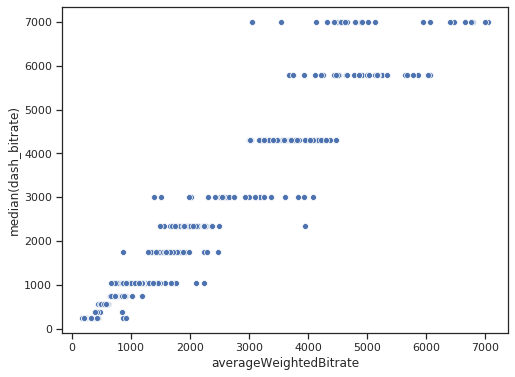

In [971]:
ax = sns.scatterplot(x="averageWeightedBitrate", y="median(dash_bitrate)", ci=None, data=data)

In [972]:
print(spearmanr(feature_analyis['averageWeightedBitrate'], feature_analyis['median(dash_bitrate)']))
print("Sp MOS vs averageWeightedBitrate", spearmanr(full['MOS'], feature_analyis['averageWeightedBitrate']))
print("Sp MOS vs median(dash_bitrate)",spearmanr(full['MOS'], feature_analyis['median(dash_bitrate)']))
print("Ken MOS vs averageWeightedBitrate", kendalltau(full['MOS'], full['averageWeightedBitrate']))
print("Ken MOS vs median(dash_bitrate)",kendalltau(full['MOS'], feature_analyis['median(dash_bitrate)']))

SpearmanrResult(correlation=0.9653196706403047, pvalue=1.9906448645198773e-263)
Sp MOS vs averageWeightedBitrate SpearmanrResult(correlation=0.5117544744965612, pvalue=2.104233520927237e-31)
Sp MOS vs median(dash_bitrate) SpearmanrResult(correlation=0.5082603827181552, pvalue=6.231969246255368e-31)
Ken MOS vs averageWeightedBitrate KendalltauResult(correlation=0.36118921785116015, pvalue=2.4475126014154054e-30)
Ken MOS vs median(dash_bitrate) KendalltauResult(correlation=0.38226369560493734, pvalue=1.8056039735401786e-30)


In [973]:
feature_analyis = feature_analyis.drop('median(dash_bitrate)', axis = 1)

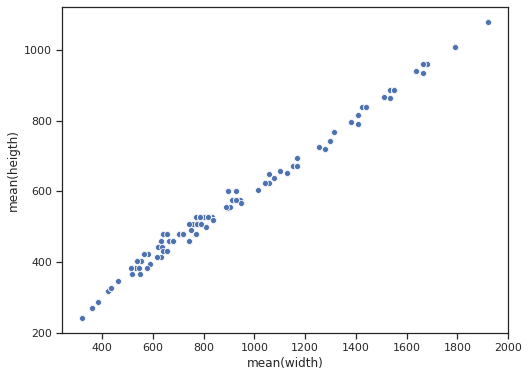

In [974]:
ax = sns.scatterplot(x="mean(width)", y="mean(heigth)", ci=None, data=data)

In [975]:
feature_analyis["width*height"] = np.nan
for index, row in feature_analyis.iterrows():
    
    value = int (row['mean(width)'])* int(row['mean(heigth)'])
    feature_analyis.at[index, 'width*height'] = value
    
    
print(spearmanr(feature_analyis['width*height'], mos))

SpearmanrResult(correlation=0.5496612948600036, pvalue=6.911935566770868e-37)


In [976]:
feature_analyis = feature_analyis.drop('mean(width)', axis = 1)
feature_analyis = feature_analyis.drop('mean(heigth)', axis = 1)

In [977]:
feature_analyis = feature_analyis.drop('Ratio on highest video quality layer', axis = 1)


In [978]:
feature_analyis = feature_analyis.drop('dash_change_count', axis = 1)

In [979]:
numerical_subset = pd.concat([feature_analyis, data["SI"]], axis = 1)
numerical_subset = pd.concat([numerical_subset, data["TI"]], axis = 1)
numerical_subset = numerical_subset.drop('Constant_bitrate', axis = 1)

In [980]:
# Select the categorical columns
categorical_subset = full[['content', 'motion', "Constant_bitrate"]]

# One hot encode
#categorical_subset = pd.get_dummies(categorical_subset)

In [981]:
features = pd.concat([numerical_subset, categorical_subset], axis = 1)

In [982]:
data_all = pd.concat([features, full["MOS"]], axis = 1)

## Эксперименты с отбором признаков 

In [983]:
#1) Спирман с признаками
sp_list=[]
for l in numerical_subset.columns:
    sp = spearmanr (numerical_subset[l], mos)
    sp_list.append ([sp[0], sp[1],l])

sp_list.sort(key=lambda x: x[0], reverse=True)  
for i in range (len(sp_list)):
    #print (round(sp_list[i][0],4), round(sp_list[i][1],4), sp_list[i][2])
    print (round(sp_list[i][0],4), sp_list[i][1], sp_list[i][2])

0.7586 2.2024195942558703e-85 Ratio on sequense quality layer max/2
0.5497 6.911935566770868e-37 width*height
0.5118 2.104233520927237e-31 averageWeightedBitrate
0.4815 1.696255763027528e-27 median(bitrates)
0.4606 5.197174527829186e-25 mean(seqPSNR)
0.4584 9.15303807725632e-25 median(PSNR)
0.1776 0.00015273816440230693 Ratio on highest sequense quality layer
0.1773 0.00015675310915291946 bitrate_max_neg_change
0.1672 0.0003681222999718926 bitrate_mean_neg_change
0.1334 0.004593634315815448 Average relative Bitrate Swithcing magnitude
0.1082 0.02166063964763299 Average Bitrate Swithcing magnitude
0.0727 0.12360524141882483 bitrate_mean_pos_change
0.0697 0.13977693433038776 TI
0.0531 0.26079045459968253 bitrate_max_pos_change
0.002 0.966040202005726 bitrate_pos_changes_count
-0.0303 0.520977385699054 initial buffer time
-0.0726 0.12403296508875011 freq_of_sw
-0.0837 0.07616152810283709 SI
-0.1583 0.0007506284806592724 Bitrate switch count
-0.1899 5.0261754086461486e-05 bitrate_neg_chang

In [984]:
data_all.columns

Index(['stallTime', 'duration', 'initial buffer time', 'Rebuffer count',
       'average duration of stalling event', 'mean(seqPSNR)',
       'averageWeightedBitrate', 'st_events_max', 'median(PSNR)',
       'bitrate_pos_changes_count', 'bitrate_neg_changes_count',
       'bitrate_max_pos_change', 'bitrate_max_neg_change',
       'bitrate_mean_pos_change', 'bitrate_mean_neg_change', 'freq_of_st',
       'Bitrate switch count', 'freq_of_sw', 'median(bitrates)',
       'Rebuffer percentage', 'Average Bitrate Swithcing magnitude',
       'Average relative Bitrate Swithcing magnitude',
       'Ratio on highest sequense quality layer',
       'Ratio on minimum sequense quality layer',
       'Ratio on sequense quality layer max/2', 'width*height', 'SI', 'TI',
       'content', 'motion', 'Constant_bitrate', 'MOS'],
      dtype='object')

## Подготовленные примерно 30 признаков 

In [179]:
data_all = pd.read_excel('Data_to_analys.xlsx', index_col=0)
categorical_subset = data_all[['content', 'motion', "Constant_bitrate"]]
mos = data_all["MOS"]
print (data_all.columns)
numerical_subset = data_all.copy()
numerical_subset = numerical_subset.drop (["MOS", 'content', 'motion', "Constant_bitrate"], axis = 1)

Index(['initial buffer time', 'Rebuffer count',
       'average duration of stalling event', 'mean(seqPSNR)',
       'averageWeightedBitrate', 'st_events_max', 'bitrate_pos_changes_count',
       'bitrate_neg_changes_count', 'bitrate_max_pos_change',
       'bitrate_max_neg_change', 'bitrate_mean_pos_change',
       'bitrate_mean_neg_change', 'freq_of_st', 'Bitrate switch count',
       'freq_of_sw', 'Rebuffer percentage',
       'Average Bitrate Swithcing magnitude',
       'Average relative Bitrate Swithcing magnitude',
       'Ratio on highest sequense quality layer',
       'Ratio on minimum sequense quality layer',
       'Ratio on sequense quality layer max/2', 'width*height', 'SI', 'TI',
       'content', 'motion', 'Constant_bitrate', 'MOS'],
      dtype='object')


In [180]:
numerical_subset# = numerical_subset.drop (["Constant_bitrate.1"], axis = 1)

initial buffer time  Rebuffer count  average duration of stalling event  \
0                1.80000               3                             0.74444   
1                0.53333               0                             0.00000   
2                0.70000               0                             0.00000   
3                0.26667               0                             0.00000   
4                0.20000               0                             0.00000   
..                   ...             ...                                 ...   
445              1.92000               1                             0.44000   
446              0.76000               1                             0.16000   
447              1.20000               0                             0.00000   
448              2.28000               4                             2.09000   
449              1.88000               1                             0.16000   

     mean(seqPSNR)  averageWeightedBitrate  st_events_max  \
0          27.5826                   222.0         1.0667   
1          29.5138                   527.6         0.0000   
2          31.7743                  1186.8         0.0000   
3          31.0625                  1014.8         0.0000   
4          31.2189                  1140.0         0.0000   
..             ...                     ...            ...   
445        28.0620                   573.0         0.4400   
446        31.7082                  1588.6         0.1600   
447        30.3363                  1134.6         0.0000   
448        35.9435                  4297.8         3.0800   
449        37.5023                  5780.2         0.1600   

     bitrate_pos_changes_count  bitrate_neg_changes_count  \
0                            0                          0   
1                            3                          0   
2                            3                          0   
3                            2                          0   
4                            3                          0   
..                         ...                        ...   
445                          0                          1   
446                          2                          0   
447                          1                          0   
448                          0                          4   
449                          0                          1   

     bitrate_max_pos_change  bitrate_max_neg_change  ...  freq_of_sw  \
0                         0                       0  ...    0.000000   
1                       302                       0  ...    0.284811   
2                      1416                       0  ...    0.280374   
3                      1708                       0  ...    0.194805   
4                      1082                       0  ...    0.294118   
..                      ...                     ...  ...         ...   
445                       0                    -185  ...    0.080906   
446                     940                       0  ...    0.183150   
447                     658                       0  ...    0.089286   
448                       0                   -1425  ...    0.193798   
449                       0                   -1156  ...    0.083056   

     Rebuffer percentage  Average Bitrate Swithcing magnitude  \
0               0.182559                             0.000000   
1               0.000000                           250.666667   
2               0.000000                           820.000000   
3               0.000000                          1230.000000   
4               0.000000                           820.000000   
..                   ...                                  ...   
445             0.042146                           185.000000   
446             0.015748                           759.000000   
447             0.000000                           658.000000   
448             0.455338                          1116.500000  

In [181]:
categorical_subset.columns

Index(['content', 'motion', 'Constant_bitrate'], dtype='object')

In [182]:
len (numerical_subset.columns) + len (categorical_subset.columns) 

27

In [183]:
# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)


In [184]:
features = pd.concat([numerical_subset, categorical_subset], axis = 1)
features = pd.concat([features, data_all["MOS"]], axis = 1)
#features.head()

In [185]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    #y = x['MOS']
    #x = x.drop(columns = ['MOS'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    #x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
     #                     'Water Use (All Water Sources) (kgal)',
      #                    'log_Water Use (All Water Sources) (kgal)',
       #                   'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    #x['MOS'] = y
               
    return x

In [186]:
features.shape

(450, 42)

In [187]:
features = pd.concat([numerical_subset, categorical_subset], axis = 1)
targets = pd.DataFrame(data_all["MOS"])

In [188]:
#features = remove_collinear_features(features, 0.6) #Взаимная коррелляция > 0.6

In [189]:
#Обновляем значения MOS, т.е. значения y
def transmutation(mos):
    return math.log(mos/(100-mos))

for index, row in targets.iterrows():
    
    value = transmutation(row['MOS'])
    #print (value)
    targets.at[index, 'MOS'] = value

In [190]:
columns_save = features.columns

In [191]:
import random

In [192]:
index_test =[]
index_val= []
for i in range(45):
    #random.seed(42) 
    #print (10*i, 9 + 10*i)
    a = random.randint(10*i, 9 + 10*i)
    index_test.append (a)
    #random.seed(24) 
    while (a != 0):
        b = random.randint(10*i, 9 + 10*i)
        if (a!=b):
            a = 0
            index_val.append (b)

In [193]:
print (index_test)
print(index_val)
len(index_val)

[4, 13, 21, 31, 46, 50, 63, 79, 88, 98, 103, 119, 120, 136, 144, 153, 161, 171, 185, 194, 207, 211, 221, 234, 245, 253, 260, 274, 283, 296, 307, 312, 325, 334, 349, 358, 362, 376, 388, 395, 403, 415, 424, 433, 445]
[3, 12, 28, 39, 40, 51, 68, 70, 83, 96, 107, 114, 122, 135, 142, 155, 166, 175, 189, 190, 208, 216, 228, 239, 249, 251, 263, 271, 281, 294, 305, 315, 323, 331, 342, 353, 367, 374, 383, 390, 400, 416, 421, 439, 443]


45

In [194]:
#Стратифицированная выборка для регрессии
k=10
n = 45#450/k
k_folds = np.zeros((k,n))
#Отсортировать по MOS
sorted_features = pd.concat([features, targets], axis = 1)
sorted_features = sorted_features.sort_values(['MOS'])
sorted_features.set_index(np.arange(450) )

val = sorted_features.iloc [index_val]

targets = pd.DataFrame(sorted_features["MOS"])
sorted_features = sorted_features.drop (["MOS"], axis = 1)

X = sorted_features.drop(index_test)
X = X.drop(index_val)
X_test = sorted_features.iloc [index_test]
X_val = sorted_features.iloc [index_val]

train_labels = targets.drop(index_test)
train_labels = train_labels.drop(index_val)
test_labels = targets.iloc [index_test]
val_labels = targets.iloc [index_val]

In [195]:
print(X.shape)
print(X_test.shape)
print(X_val.shape)
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)

(360, 41)
(45, 41)
(45, 41)
(360, 1)
(45, 1)
(45, 1)


In [196]:
X_with_cols = pd.DataFrame(X, columns = columns_save)

## Models to Evaluate

We will compare five different machine learning models using the great [Scikit-Learn library](http://scikit-learn.org/stable/):

1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression

Again, here I'm focusing on implementation rather than explaining how these work. In addition to Hands-On Machine Learning, another great resource (this one is free online) for reading about machine learning models is [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/).

To compare the models, we are going to be mostly using the Scikit-Learn defaults for the model hyperparameters. Generally these will perform decently, but should be optimized before actually using a model. At first, we just want to determine the baseline performance of each model, and then we can select the best performing model for further optimization using hyperparameter tuning. Remember that the default hyperparameters will get a model up and running, but nearly always should be adjusted using some sort of search to find the best settings for your problem! 

Here is what the Scikit-learn documentation [says about the defaults](https://arxiv.org/abs/1309.0238):

    __Sensible defaults__: Whenever an operation requires a user-defined parameter,
    an appropriate default value is defined by the library. The default value
    should cause the operation to be performed in a sensible way (giving a baseline
    solution for the task at hand.)

One of the best parts about scikit-learn is that all models are implemented in an identical manner: once you know how to build one, you can implement an extremely diverse array of models. Here we will implement the entire training and testing procedures for a number of models in just a few lines of code.

In [197]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [198]:
baseline_guess = np.median(train_labels)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(test_labels, baseline_guess))

The baseline guess is a score of 0.53
Baseline Performance on the test set: MAE = 0.5530


In [199]:
# Imputing missing values and scaling values
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

## Scaling Features

In [200]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [201]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))
y_val = np.array(val_labels).reshape((-1, ))

### Models to Evaluate

In [202]:
# Function to calculate mean absolute error
#def mae(y_true, y_pred):
    #return np.mean(abs(y_true - y_pred))
    
def mae(y_true, y_val, y_pred, y_pred_val):    
    return np.mean(abs(y_true - y_pred)), np.mean(abs(y_val - y_pred_val))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    
    y_pred_val = model.predict(X_val)
    #model_mae = mae(y_test, model_pred)
    model_mae = mae(y_test, y_val, model_pred, y_pred_val)
    
    # Return the performance metric
    return model_mae

In [203]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance: MAE test = %0.4f, MAE val = %0.4f' % lr_mae)

Linear Regression Performance: MAE test = 0.2444, MAE val = 0.2421


In [204]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance: MAE test = %0.4f, MAE val = %0.4f' % svm_mae)

Support Vector Machine Regression Performance: MAE test = 0.1795, MAE val = 0.1238


In [205]:
random_forest = RandomForestRegressor(random_state=42)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance: MAE test = %0.4f, MAE val = %0.4f' % random_forest_mae)

Random Forest Regression Performance: MAE test = 0.1182, MAE val = 0.1383


In [206]:
gradient_boosted = GradientBoostingRegressor(random_state=42)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)
print('Gradient Boosted Regression Performance: MAE test = %0.4f, MAE val = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance: MAE test = 0.1494, MAE val = 0.1174


In [207]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance: MAE test = %0.4f, MAE val = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance: MAE test = 0.3084, MAE val = 0.2712


In [208]:
lr_maea = lr_mae
svm_maea = svm_mae
random_forest_maea = random_forest_mae
gradient_boosted_maea = gradient_boosted_mae
knn_maea = knn_mae

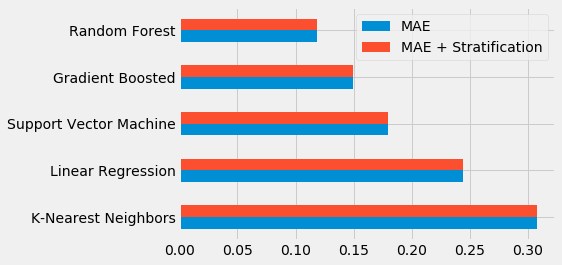

In [209]:
mae = [lr_mae[0], svm_mae[0], random_forest_mae[0], 
                                         gradient_boosted_mae[0], knn_mae[0]]

maes = [lr_maea[0], svm_maea[0], random_forest_maea[0], 
                                         gradient_boosted_maea[0], knn_maea[0]]

index = ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors']
df = pd.DataFrame({'MAE': mae, 'MAE + Stratification': maes}, index=index)
df=df.sort_values('MAE + Stratification', ascending = False)
ax = df.plot.barh()

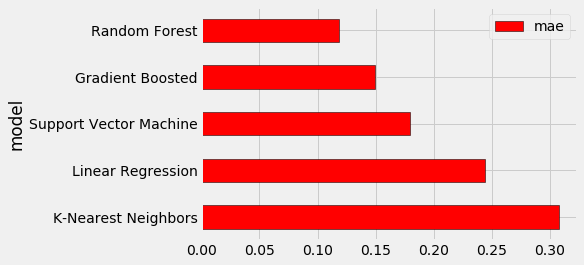

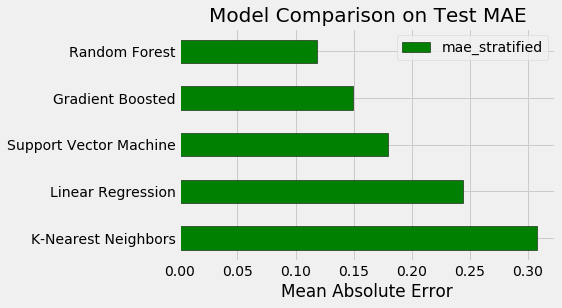

In [210]:
plt.style.use('fivethirtyeight')
#figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae[0], svm_mae[0], random_forest_mae[0], 
                                         gradient_boosted_mae[0], knn_mae[0]],
                                 'mae_stratified': [lr_maea[0], svm_maea[0], random_forest_maea[0], 
                                         gradient_boosted_maea[0], knn_maea[0]]}  )

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

model_comparison.sort_values('mae_stratified', ascending = False).plot(x = 'model', y = 'mae_stratified', kind = 'barh',
                                                           color = 'green', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);


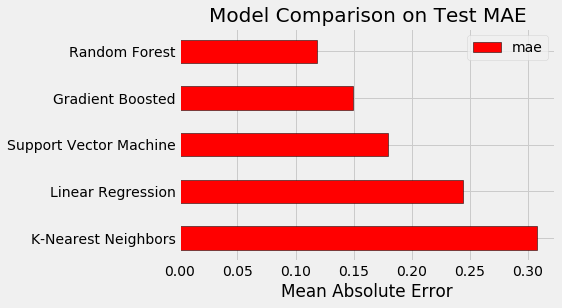

In [211]:
plt.style.use('fivethirtyeight')
#figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae[0], svm_mae[0], random_forest_mae[0], 
                                         gradient_boosted_mae[0], knn_mae[0]]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);


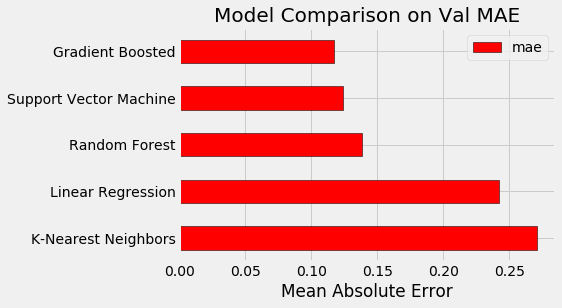

In [212]:
plt.style.use('fivethirtyeight')
#figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae[1], svm_mae[1], random_forest_mae[1], 
                                         gradient_boosted_mae[1], knn_mae[1]]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Val MAE', size = 20);

Depending on the run (the exact results change slighty each time), the gradient boosting regressor performs the best followed by the random forest. I have to admit that this is not the most fair comparison because we are using mostly the default hyperparameters. Especially with the Support Vector Regressor, the hyperparameters have a significant influence on performance. (the random forest and gradient boosting methods are great for starting out because the performance is less dependent on the model settings). Nonetheless, from these results, we can conclude that machine learning is applicable because all the models significantly outperform the baseline!

From here, I am going to concentrate on optimizing the best model using hyperparamter tuning. Given the results here, I will concentrate on using the `GradientBoostingRegressor`. This is the Scikit-Learn implementation of [Gradient Boosted Trees](http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf) which has won many [Kaggle competitions](http://matthewemery.ca/Why-Kagglers-Love-XGBoost/) in the past few years. The Scikit-Learn version is generally slower than the `XGBoost` version, but here we'll stick to Scikit-Learn because the syntax is more familiar. [Here's a guide](https://www.kaggle.com/dansbecker/learning-to-use-xgboost/code) to using the implementation in the `XGBoost` package.

In [213]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [80, 85, 90, 95, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

# Maximum depth of each tree
max_depth = [3, 4, 5, 6, 7]

# Minimum number of samples per leaf
min_samples_leaf = [3, 4, 5, 6]

# Minimum number of samples to split a node
min_samples_split = [8, 9, 10, 11, 12, 13, 14]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

#Регяляризация
penalty=['l2', 'l1']

#Параметр регуляризации
alpha = np.linspace(0.0001, 0.01, num = 100)

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}
                       #,
                     # "penalty": penalty,
                    #  "alpha" : alpha}

# Model Optimization 

In machine learning, optimizing a model means finding the best set of hyperparameters for a particular problem. 

## Hyperparameters

First off, we need to understand what [model hyperparameters are in contrast to model parameters](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/) :

* Model __hyperparameters__ are best thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or the number of neighbors used in K Nearest Neighbors Regression. 
* Model __parameters__ are what the model learns during training, such as the weights in the linear regression.

We as data scientists control a model by choosing the hyperparameters, and these choices can have a significant effect on the final performance of the model (although usually not as great of an effect as getting more data or engineering features). 

[Tuning the model hyperparameters](http://scikit-learn.org/stable/modules/grid_search.html) controls the balance of under vs over fitting in a model. We can try to correct for under-fitting by making a more complex model, such as using more trees in a random forest or more layers in a deep neural network. A model that underfits has high bias, and occurs when our model does not have enough capacity (degrees of freedom) to learn the relationship between the features and the target. We can try to correct for overfitting by limiting the complexity of the model and applying regularization. This might mean decreasing the degree of a polynomial regression, or adding dropout layers to a deep neural network. A model that overfits has high variance and in effect has memorized the training set. Both underfitting and overfitting lead to poor generalization performance on the test set. 

The problem with choosing the hyperparameters is that no set will work best across all problems. Therefore, for every new dataset, we have to find the best settings. This can be a time-consuming process, but luckily there are several options for performing this procedure in Scikit-Learn. Even better, new libraries, such as [TPOT](https://epistasislab.github.io/tpot/) by epistasis labs, is aiming to do this process automatically for you! For now, we will stick to doing this manually (sort of) in Scikit-Learn, but stay tuned for an article on automatic model selection! 

## Hyperparameter Tuning with Random Search and Cross Validation

We can choose the best hyperparameters for a model through random search and cross validation. 

* Random search refers to the method in which we choose hyperparameters to evaluate: we define a range of options, and then randomly select combinations to try. This is in contrast to grid search which evaluates every single combination we specify. Generally, random search is better when we have limited knowledge of the best model hyperparameters and we can use random search to narrow down the options and then use grid search with a more limited range of options. 
* Cross validation is the method used to assess the performance of the hyperparameters. Rather than splitting the training set up into separate training and validation sets which reduces the amount of training data we can use, we use K-Fold Cross Validation. This means dividing the training data into K folds, and then going through an iterative process where we first train on K-1 of the folds and then evaluate performance on the kth fold. We repeat this process K times so eventually we will have tested on every example in the training data with the key that each iteration we are testing on data that we __did not train on__.  At the end of K-fold cross validation, we take the average error on each of the K iterations as the final performance measure and then train the model on all the training data at once. The performance we record is then used to compare different combinations of hyperparameters. 

A picture of k-fold cross validation using k = 5 is shown below:

![image](images/kfold_cv.png)

Here we will implement random search with cross validation to select the optimal hyperparameters for the gradient boosting regressor. We first define a grid then peform an iterative process of: randomly sample a set of hyperparameters from the grid, evaluate the hyperparameters using 4-fold cross-validation, and then select the hyperparameters with the best performance. 

Of course we don't actually do this iteration ourselves, we let Scikit-Learn and `RandomizedSearchCV` do the process for us! 

In [214]:
hyperparameter_grid

{'loss': ['ls', 'lad', 'huber'],
 'n_estimators': [80,
  85,
  90,
  95,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190,
  200],
 'max_depth': [3, 4, 5, 6, 7],
 'min_samples_leaf': [3, 4, 5, 6],
 'min_samples_split': [8, 9, 10, 11, 12, 13, 14],
 'max_features': ['auto', 'sqrt', 'log2', None]}

In [215]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

#scoring_list = ["explained_variance",'neg_mean_absolute_error' ]
from sklearn.model_selection import ShuffleSplit
#from sklearn.model_selection import cross_validate

#n_splits=5, test_size=.25, random_state=0
#cv = cross_decomposition.ShuffleSplit(train_labels, n_splits = 20, test_size=0.2, random_state=42)
rs = ShuffleSplit(n_splits=5, test_size=.20, random_state=42)
cv = rs.split(train_labels)
# Set up the random search with CV-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=cv, n_iter=5000, 
                               scoring = "neg_mean_absolute_error",
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)
                               # refit = False)

#Теперь это полный перебор        
#random_cv = GridSearchCV(estimator=model,
#                               param_grid=hyperparameter_grid,
#                               cv=cv, 
#                               scoring = "neg_mean_absolute_error",
#                               n_jobs = -1, verbose = 1, 
#                               return_train_score = True)
#                               # refit = False)        

In [1033]:
# Fit on the training data
random_cv.fit(X, y)

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

RandomizedSearchCV(cv=<generator object BaseShuffleSplit.split at 0x7f67aa20b6d0>,
                   error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_sp...
                   param_distributions={

In [216]:
random_cv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [217]:
# Create a range of trees to evaluate
#trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}
trees_grid = {'n_estimators': [85, 90, 95, 100, 110, 120, 130,135, 140, 145, 150, 160, 170, 180, 190, 200, 210, 220, 230,240,250]}
model = GradientBoostingRegressor(loss = 'huber', max_depth = 3,
                                  min_samples_leaf = 6,
                                  min_samples_split = 10,
                                  max_features = 'sqrt',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 5, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [218]:
# Fit the grid search
grid_search.fit(X, y)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    8.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='huber', max_depth=3,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=6,
                                                 min_samples_split=10,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_...
                            

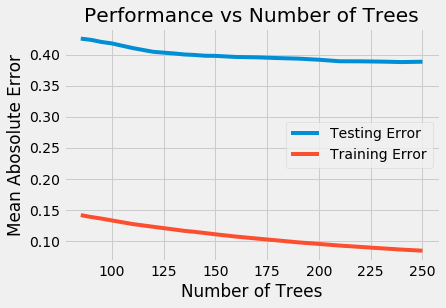

In [219]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
#figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');


### Evaluate Final Model on the Test Set

In [220]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=240,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [221]:
%%timeit -n 1 -r 5
default_model.fit(X, y)

149 ms ± 2.11 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [222]:
%%timeit -n 1 -r 5
final_model.fit(X, y)

447 ms ± 9.63 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


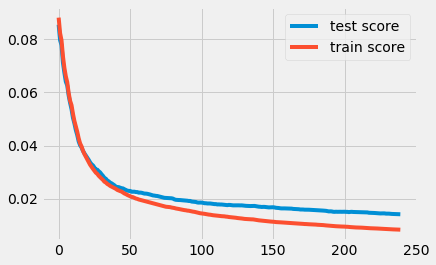

In [223]:
test_score = np.empty(len(final_model.estimators_))
train_score = np.empty(len(final_model.estimators_))
val_score = np.empty(len(final_model.estimators_))

for i, pred in enumerate(final_model.staged_predict (X_test)):
    test_score[i] = final_model.loss_(y_test, pred)

for i, pred in enumerate(final_model.staged_predict(X)):
    train_score[i] = final_model.loss_(y, pred)
    
for i, pred in enumerate(final_model.staged_predict(X_val)):
    val_score[i] = final_model.loss_(y_val, pred)    

plt.plot(test_score)
plt.plot(train_score)
plt.legend(['test score', 'train score'])

ValueError: x and y must have same first dimension, but have shapes (250,) and (240,)

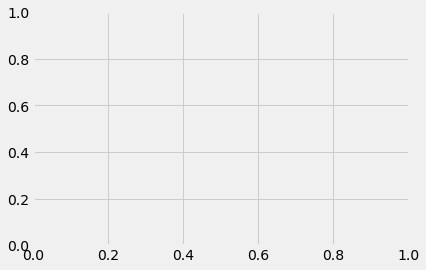

<Figure size 7200x216 with 0 Axes>

In [224]:
# First create some toy data:
x = np.arange(-10, 240, 1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

# Create two subplots and unpack the output array immediately
ax1 = plt.subplot(1, 1, 1)
plt.figure(figsize=(100,3))
ax1.plot(x, test_score)
ax1.plot(x, train_score)
ax1.plot(x, val_score)
ax1.legend(['test score', 'train score', "val_score"])
ax1.set_title('Loss')



ax1.xaxis.set_major_locator(MultipleLocator(10.000))
ax1.xaxis.set_minor_locator(AutoMinorLocator(10))
ax1.yaxis.set_major_locator(MultipleLocator(.1000))
ax1.yaxis.set_minor_locator(AutoMinorLocator(1))
ax1.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax1.set_xlim(-10, 250)
ax1.set_ylim(-0.05, 0.6)

ax1.tick_params(which='major', width=1.0)
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', width=1.0, labelsize=10)
ax1.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax1.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)


#ax1.plot(X, Y, linewidth=0,
 #       marker='o', markerfacecolor='w', markeredgecolor='k')

#ax.set_title("Spatio-Temporal complexity space", fontsize=20, verticalalignment='bottom')
#ax.set_xlabel("Temporal information")
#ax.set_ylabel("Spatial informationl")


np.argmin(test_score[:200])

In [ ]:
import copy
final_model2 = copy.copy(final_model)

In [ ]:
final_model2.n_estimators = 193

In [225]:
final_model2

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=193,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [226]:
final_model2.fit(X, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=193,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [102]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

default_pred_val = default_model.predict(X_val)
final_pred_val = final_model.predict(X_val)

print('Default model performance: MAE test = %0.4f, MAE val = %0.4f' % mae(y_test, y_val, default_pred,default_pred_val))
print('Final model performance : MAE test = %0.4f, MAE val = %0.4f' % mae(y_test, y_val, final_pred, final_pred_val))

TypeError: 'list' object is not callable

In [ ]:
print(spearmanr(final_pred, y_test))

In [103]:
print(spearmanr(final_pred_val, y_val))

SpearmanrResult(correlation=0.9756258234519104, pvalue=5.8824163329399905e-30)


In [104]:
final_pred = final_model2.predict(X_test)
final_pred_val = final_model2.predict(X_val)

print('Final model performance : MAE test = %0.4f, MAE val = %0.4f' % mae(y_test, y_val, final_pred, final_pred_val))
print(spearmanr(final_pred, y_test))
print(spearmanr(final_pred_val, y_val))

TypeError: 'list' object is not callable

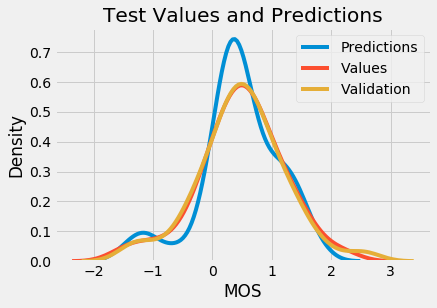

In [105]:
#figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
#sns.kdeplot(final_pred_val, label = 'Validation')
sns.kdeplot(y_val, label = 'Validation')

# Label the plot
plt.xlabel('MOS'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

In [106]:
def vqa (data):
    mos = 100/(1+math.exp(-data))
    return mos
final_pred_v = list (map(lambda x : vqa(x), final_pred))
y_test_v = list (map(lambda x : vqa(x), y_test))
y_val_v= list (map(lambda x : vqa(x), y_val))
final_pred_val_v= list (map(lambda x : vqa(x), final_pred_val))


Text(0.5, 1.0, 'Gradient Boosting model')

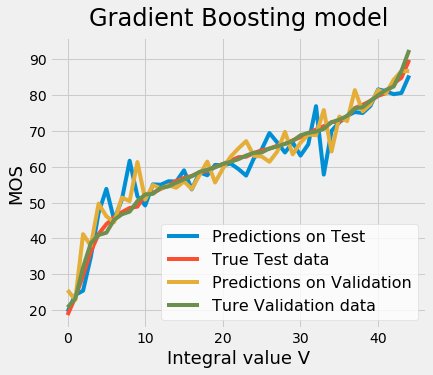

In [227]:
fig = plt.figure(figsize=(6, 5))



ax = fig.add_subplot(1, 1, 1)


plt.style.use('grayscale')

plt.plot(final_pred_v, label = "Predictions on Test")
plt.plot(y_test_v, label = "True Test data")

plt.plot(final_pred_val_v, label = "Predictions on Validation")
plt.plot(y_val_v, label = "Ture Validation data")
plt.legend(fontsize=16)

ax.set_xlabel("Integral value V", fontsize=18)
ax.set_ylabel("MOS", fontsize=18)

#plt.xlabel('xlabel', fontsize=18)

ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)

ax.set_title("Gradient Boosting model", fontsize=24, verticalalignment='bottom')

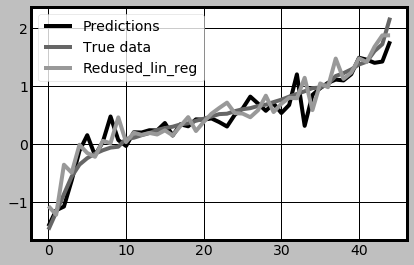

In [108]:
#plt.plot(model_pred)
plt.plot(final_pred)
plt.plot(y_test)


plt.plot(final_pred_val)
plt.legend(['Predictions','True data', "Redused_lin_reg" ])

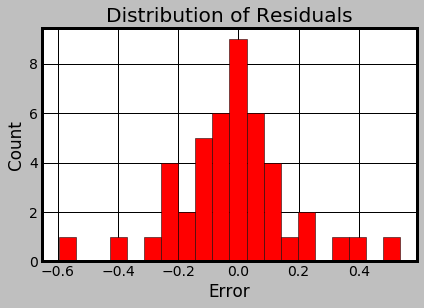

In [109]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

In [110]:
def vqa (data):
    mos = 100/(1+math.exp(-data))
    return mos

In [111]:
v_to_vis= list (map(lambda x : vqa(x), V.tolist()))
y_to_vis = list (map(lambda x : vqa(x), y_train))

NameError: name 'V' is not defined

In [112]:
pyplot.plot(y_to_vis)
pyplot.plot(v_to_vis)

NameError: name 'pyplot' is not defined

# Recreate Final Model

In [322]:
data_all = pd.read_excel('Data_to_analys.xlsx', index_col=0)
categorical_subset = data_all[['content', 'motion', "Constant_bitrate"]]
mos = data_all["MOS"]
numerical_subset = data_all.copy()
numerical_subset = numerical_subset.drop (["MOS", 'content', 'motion', "Constant_bitrate"], axis = 1)
#numerical_subset = numerical_subset.drop (["Constant_bitrate.1"], axis = 1)
categorical_subset = pd.get_dummies(categorical_subset)
features = pd.concat([numerical_subset, categorical_subset], axis = 1)
features = pd.concat([features, data_all["MOS"]], axis = 1)
features = remove_collinear_features(features, 0.6) #Взаимная коррелляция > 0.6
features = pd.concat([numerical_subset, categorical_subset], axis = 1)
targets = pd.DataFrame(data_all["MOS"])

#Попробуем без 
# for index, row in targets.iterrows():
#     value = transmutation(row['MOS'])
#     #print (value)
#     targets.at[index, 'MOS'] = value
    
#X, X_test, train_labels, test_labels = train_test_split(features, targets,test_size = 0.3,random_state = 42)



index_test =[]
index_val= []
for i in range(45):
    #random.seed(42) 
    #print (10*i, 9 + 10*i)
    a = random.randint(10*i, 9 + 10*i)
    index_test.append (a)
    #random.seed(24) 
    while (a != 0):
        b = random.randint(10*i, 9 + 10*i)
        if (a!=b):
            a = 0
            index_val.append (b)

            #Стратифицированная выборка для регрессии
k=10
n = 45#450/k
k_folds = np.zeros((k,n))
#Отсортировать по MOS
sorted_features = pd.concat([features, targets], axis = 1)
sorted_features = sorted_features.sort_values(['MOS'])
sorted_features.set_index(np.arange(450) )

val = sorted_features.iloc [index_val]

targets = pd.DataFrame(sorted_features["MOS"])
sorted_features = sorted_features.drop (["MOS"], axis = 1)



X = sorted_features.drop(index_test)
X = X.drop(index_val)
X_test = sorted_features.iloc [index_test]
X_val = sorted_features.iloc [index_val]

train_labels = targets.drop(index_test)
train_labels = train_labels.drop(index_val)
test_labels = targets.iloc [index_test]
val_labels = targets.iloc [index_val]

columns_save = sorted_features.columns
X_with_cols = pd.DataFrame(X, columns = columns_save)

# Transform both training data and testing data
X = np.array(X)
X_test = np.array(X_test)
X_val = np.array(X_val)

# Sklearn wants the labels as one-dimensional vectors
y = np.array(train_labels).reshape((-1,))
y_test = np.array(test_labels).reshape((-1,))
y_val = np.array(val_labels).reshape((-1, ))

In [323]:
len(X_with_cols.columns)

41

In [324]:
print(index_test)
print(index_val)

[4, 13, 21, 31, 46, 50, 63, 79, 88, 98, 103, 119, 120, 136, 144, 153, 161, 171, 185, 194, 207, 211, 221, 234, 245, 253, 260, 274, 283, 296, 307, 312, 325, 334, 349, 358, 362, 376, 388, 395, 403, 415, 424, 433, 445]
[3, 12, 28, 39, 40, 51, 68, 70, 83, 96, 107, 114, 122, 135, 142, 155, 166, 175, 189, 190, 208, 216, 228, 239, 249, 251, 263, 271, 281, 294, 305, 315, 323, 331, 342, 353, 367, 374, 383, 390, 400, 416, 421, 439, 443]


In [325]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [50, 100, 150, 200, 300, 400]

# Maximum depth of each tree
max_depth = [3, 4, 5, 6, 7, 8]

# Minimum number of samples per leaf
min_samples_leaf = [3, 4, 5, 6, 7, 8]

# Minimum number of samples to split a node
min_samples_split = [8, 9, 10, 11, 12, 13, 14]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

#Регяляризация
#penalty=['l2', 'l1']

#Параметр регуляризации
#alpha = np.linspace(0.0001, 0.01, num = 100)

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [326]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=5000, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [118]:
random_cv.fit(X, y)

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1258 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1808 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2458 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 3208 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 4058 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 5008 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6058 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 7208 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 8458 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 9808 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 11258 tasks      |

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [327]:
random_cv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [328]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [300, 320, 340, 360, 380, 400,420, 440, 460, 480, 500, 520, 540, 560, 600]}

model = GradientBoostingRegressor(loss = 'ls', max_depth = 3,
                                  min_samples_leaf = 8,
                                  min_samples_split = 10,
                                  max_features = 'sqrt',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 5, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [329]:
grid_search.fit(X, y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=8,
                                                 min_samples_split=10,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [330]:
model = grid_search.best_estimator_

In [331]:
model.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=8, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

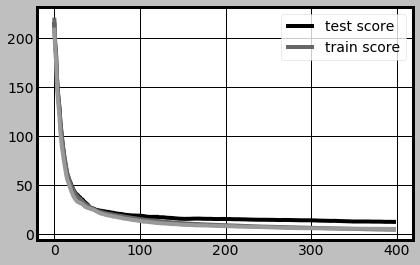

In [332]:
test_score = np.empty(len(model.estimators_))
train_score = np.empty(len(model.estimators_))
val_score = np.empty(len(model.estimators_))

for i, pred in enumerate(model.staged_predict (X_test)):
    test_score[i] = model.loss_(y_test, pred)

for i, pred in enumerate(model.staged_predict(X)):
    train_score[i] = model.loss_(y, pred)
    
for i, pred in enumerate(model.staged_predict(X_val)):
    val_score[i] = model.loss_(y_val, pred) 
    
plt.plot(test_score)
plt.plot(train_score)
plt.plot(val_score)
plt.legend(['test score', 'train score'])

ValueError: x and y must have same first dimension, but have shapes (600,) and (400,)

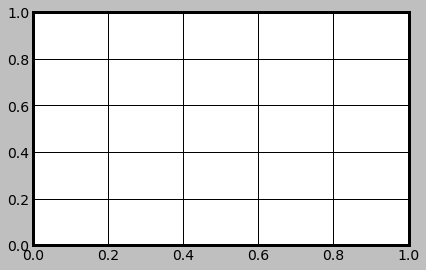

<Figure size 7200x216 with 0 Axes>

In [333]:
# First create some toy data:
x = np.arange(0, 600, 1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

# Create two subplots and unpack the output array immediately
ax1 = plt.subplot(1, 1, 1)
plt.figure(figsize=(100,3))
ax1.plot(x, test_score)
ax1.plot(x, train_score)
ax1.plot(x, val_score)
ax1.legend(['test score', 'train score', "val_score"])
ax1.set_title('Loss')



ax1.xaxis.set_major_locator(MultipleLocator(100.000))
ax1.xaxis.set_minor_locator(AutoMinorLocator(100))
ax1.yaxis.set_major_locator(MultipleLocator(10.1000))
ax1.yaxis.set_minor_locator(AutoMinorLocator(1))
ax1.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax1.set_xlim(-10, 600)
ax1.set_ylim(-1, 200)

ax1.tick_params(which='major', width=1.0)
ax1.tick_params(which='major', length=10)
ax1.tick_params(which='minor', width=1.0, labelsize=10)
ax1.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax1.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)


#ax1.plot(X, Y, linewidth=0,
 #       marker='o', markerfacecolor='w', markeredgecolor='k')

#ax.set_title("Spatio-Temporal complexity space", fontsize=20, verticalalignment='bottom')
#ax.set_xlabel("Temporal information")
#ax.set_ylabel("Spatial informationl")


np.argmin(test_score[:600])

In [ ]:
import copy
final_model3 = copy.copy(model)

In [334]:
final_model3.n_estimators = 493

In [335]:
final_model3.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=8, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=493,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [336]:
#  Make predictions on the test set
model_pred = final_model3.predict(X_test)
model_pred_val = final_model3.predict(X_val)

print('Final Model Performance on the test set: MAE test = %0.4f, MAE val = %0.4f' % mae(y_test, y_val, model_pred, model_pred_val))
print(spearmanr(final_pred, y_test))
print(spearmanr(final_pred_val, y_val))

TypeError: 'list' object is not callable

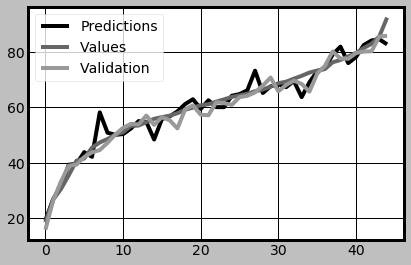

In [337]:
plt.plot(model_pred)
plt.plot(y_test)
plt.plot(model_pred_val)
plt.legend(['Predictions', 'Values','Validation' ])

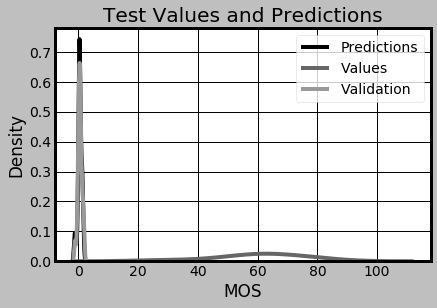

In [338]:
#figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')
sns.kdeplot(final_pred_val, label = 'Validation')

# Label the plot
plt.xlabel('MOS'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

In [339]:
y_gb = copy.copy(y_test)
final_pred_gb = copy.copy(model_pred)
y_val_gb = copy.copy(y_val)
final_pred_val_gb = copy.copy(model_pred_val)

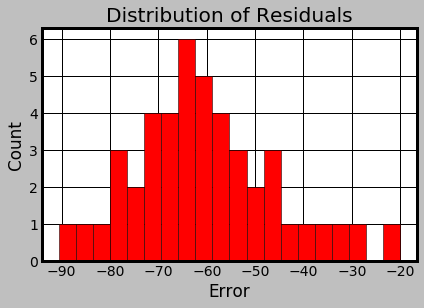

In [340]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

## Interprete the Model
Machine learning is often [criticized as being a black-box](https://www.technologyreview.com/s/604087/the-dark-secret-at-the-heart-of-ai/): we put data in on one side and it gives us the answers on the other. While these answers are often extremely accurate, the model tells us nothing about how it actually made the predictions. This is true to some extent, but there are ways in which we can try and discover how a model "thinks" such as the [Locally Interpretable Model-agnostic Explainer (LIME)](https://arxiv.org/pdf/1602.04938.pdf). This attemps to explain model predictions by learning a linear regression around the prediction, which is an easily interpretable model!

We will explore several ways to interpret our model:

* Feature importances
* Locally Interpretable Model-agnostic Explainer (LIME)
* Examining a single decision tree in the ensemble.

## Feature Importances

One of the basic ways we can interpret an ensemble of decision trees is through what are known as the feature importances. These can be interpreted as the variables which are most predictive of the target. While the actual details of the feature importances are quite complex ([here is a Stack Overflow question on the subject](https://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined), we can use the relative values to compare the features and determine which are most relevant to our problem. 

Extracting the feature importances from a trained ensemble of trees is quite easy in scikit-learn. We will store the feature importances in a dataframe to analyze and visualize them.

In [341]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(X_with_cols.columns), 
                                #'importance': model.feature_importances_})
                                'importance': final_model3.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

feature  importance
0    Ratio on sequense quality layer max/2    0.230500
1                             width*height    0.117446
2  Ratio on minimum sequense quality layer    0.111301
3                   averageWeightedBitrate    0.079404
4                            mean(seqPSNR)    0.074986
5                            st_events_max    0.038612
6                      initial buffer time    0.028983
7                               freq_of_sw    0.028588
8                           Rebuffer count    0.027473
9       average duration of stalling event    0.025016

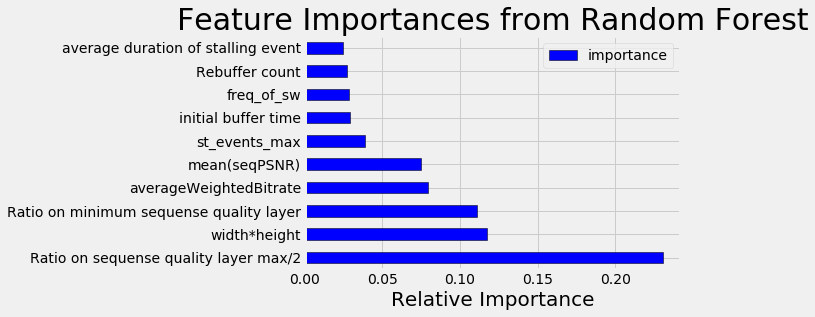

In [342]:
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);

# Use Feature Importances for Feature Selection

Given that not every feature is important for finding the score, what would happen if we used a simpler model, such as a linear regression, with the subset of most important features from the random forest? The linear regression did outperform the baseline, but it did not perform well compared to the model complex models. Let's try using only the 10 most important features in the linear regression to see if performance is improved. We can also limit to these features and re-evaluate the random forest.

In [343]:
# Extract the names of the most important features
most_important_features = feature_results['feature'][:10]

# Find the index that corresponds to each feature name
indices = [list(X_with_cols.columns).index(x) for x in most_important_features]

print(indices)

print(type(indices))

# Keep only the most important features
X_reduced = X[:, indices]
X_test_reduced = X_test[:, indices]

X_val_reduced = X_val[:, indices]

print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

[20, 21, 19, 4, 3, 5, 0, 14, 1, 2]
<class 'list'>
Most important training features shape:  (360, 10)
Most important testing  features shape:  (45, 10)


In [344]:
lr = LinearRegression()

# Fit on full set of features
lr.fit(X, y)
lr_full_pred = lr.predict(X_test)

lr_full_pred_val = lr.predict(X_val)


# Fit on reduced set of features
lr.fit(X_reduced, y)
lr_reduced_pred = lr.predict(X_test_reduced)
lr_reduced_pred_val = lr.predict(X_val_reduced)


# Display results
#print('Linear Regression Full Results: MAE =    %0.4f.' % mae(y_test, lr_full_pred))
#print('Linear Regression Reduced Results: MAE = %0.4f.' % mae(y_test, lr_reduced_pred))
#mae(y_test, y_val, lr_full_pred, lr_full_pred_val)
#print('Linear Regression Full Results: MAE test = %0.4f, MAE val = %0.4f' % mae(y_test, y_val, lr_full_pred, lr_full_pred_val))
#print('Linear Regression Reduced Results: MAE test = %0.4f, MAE val = %0.4f' % mae(y_test, y_val, lr_reduced_pred, lr_reduced_pred_val))

In [345]:
print(spearmanr(lr_reduced_pred, y_test))
print(spearmanr(lr_reduced_pred_val, y_val))

SpearmanrResult(correlation=0.8641633728590249, pvalue=2.080356812463219e-14)
SpearmanrResult(correlation=0.8469038208168642, pvalue=2.2719777812768093e-13)


In [346]:
j=0
for i in indices:
    print (round(lr.coef_[j],4), "*",X_with_cols.columns[i]) 
    j+=1

17.8421 * Ratio on sequense quality layer max/2
0.0 * width*height
-21.6095 * Ratio on minimum sequense quality layer
0.0006 * averageWeightedBitrate
0.5554 * mean(seqPSNR)
-2.2185 * st_events_max
0.2078 * initial buffer time
-1.5927 * freq_of_sw
-3.3137 * Rebuffer count
0.1381 * average duration of stalling event


In [347]:
lr.intercept_

35.08551064684238

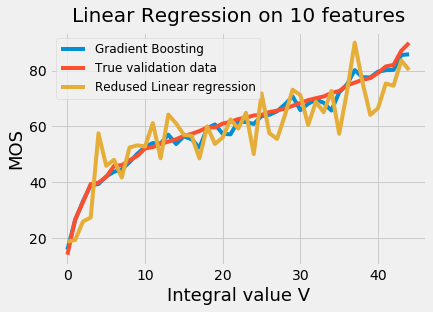

In [348]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(final_pred_val_gb, label = "Gradient Boosting")
plt.plot(y_val, label = "True validation data")

X_val_reduced = X_val[:, indices]
Redused_lin_reg = np.dot(X_val_reduced, lr.coef_) + lr.intercept_
plt.plot(Redused_lin_reg, label = "Redused Linear regression")

#plt.plot(Lin_reg_simple_to_vis, label = "Referense-free Lin reg")

#plt.plot(Lin_reg, label = "Lasso Lin reg")

ax.set_title("Linear Regression on 10 features", fontsize=20, verticalalignment='bottom')

plt.legend(fontsize=12)
ax.set_xlabel("Integral value V", fontsize=18)
ax.set_ylabel("MOS", fontsize=18)

ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)

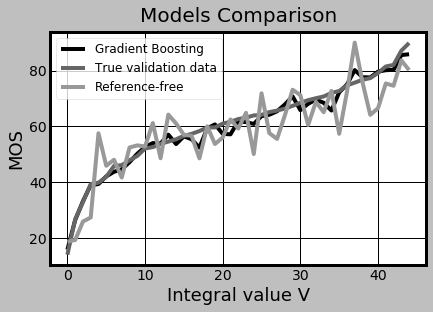

In [354]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.style.use('grayscale')

plt.plot(final_pred_val_gb, label = "Gradient Boosting")
plt.plot(y_val, label = "True validation data")


plt.plot(Redused_lin_reg, label = "Reference-free")


ax.set_title("Models Comparison", fontsize=20, verticalalignment='bottom')

plt.legend(fontsize=12)
ax.set_xlabel("Integral value V", fontsize=18)
ax.set_ylabel("MOS", fontsize=18)

ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)

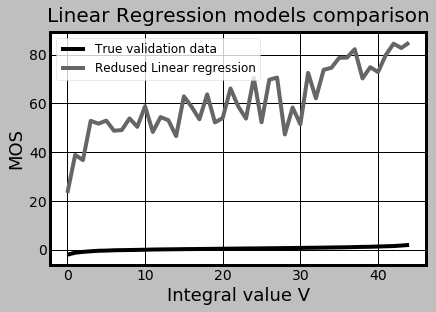

In [306]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#plt.plot(final_pred_val_gb, label = "Gradient Boosting")
plt.plot(y_val, label = "True validation data")

#X_val_reduced = X_val[:, indices]
#Redused_lin_reg = np.dot(X_val_reduced, lr.coef_) + lr.intercept_
#plt.plot(final_pred_val_gb, label = "Gradient Boosting")
plt.plot(Redused_lin_reg, label = "Redused Linear regression")

#plt.plot(Lin_reg_simple_to_vis, label = "Referense-free")

#plt.plot(Lin_reg, label = "Lasso")

ax.set_title("Linear Regression models comparison", fontsize=20, verticalalignment='bottom')

plt.legend(fontsize=12)
ax.set_xlabel("Integral value V", fontsize=18)
ax.set_ylabel("MOS", fontsize=18)

ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)

In [ ]:
V=np.dot(X_reduced, lr.coef_) + lr.intercept_

In [143]:
V.shape

NameError: name 'V' is not defined

In [153]:
def vqa (data):
    mos = 100/(1+math.exp(-data))
    return mos


In [154]:
v_to_vis= list (map(lambda x : vqa(x), V.tolist()))
y_to_vis = list (map(lambda x : vqa(x), y_train))

NameError: name 'V' is not defined

IndexError: index 20 is out of bounds for axis 1 with size 17

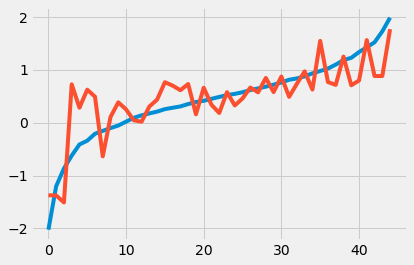

In [176]:
#plt.plot(model_pred)
plt.plot(y_val)
plt.plot(model_pred_val)
X_val_reduced = X_val[:, indices]
Redused_lin_reg = np.dot(X_val_reduced, lr.coef_) + lr.intercept_
plt.plot(Redused_lin_reg)

#plt.plot(final_pred_val_gb)

plt.legend(['GB_Predictions_validation','Validation', "Redused_Lin_reg", ])

In [177]:
X_val_reduced = X_val[:, indices]
Redused_lin_reg = np.dot(X_val_reduced, lr.coef_) + lr.intercept_

IndexError: index 20 is out of bounds for axis 1 with size 17

In [178]:
Lin_reg_simple_to_vis= list (map(lambda x : vqa(x), Lin_reg_simple))

NameError: name 'Lin_reg' is not defined

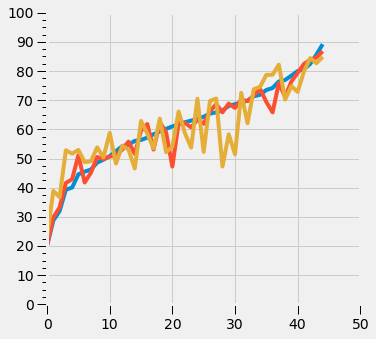

In [158]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)

def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(10.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(10.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 50)
ax.set_ylim(0, 100)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

#ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

plt.plot(y_val)
plt.plot(model_pred_val)

plt.plot(Redused_lin_reg, )

plt.plot(Lin_reg)

plt.plot(Lin_reg_simple_to_vis)

plt.legend(['Predictions','Validation', "Redused_lin_reg", "Lin_reg", "Lin_reg_simple"], fontsize=14)

#ax.plot(X, Y, linewidth=0,
#        marker='o', markerfacecolor='w', markeredgecolor='k')

#ax.set_title("Spatio-Temporal complexity space", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("Integral value V", fontsize=18)
ax.set_ylabel("MOS", fontsize=18)

#plt.xlabel('xlabel', fontsize=18)

ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)

NameError: name 'Lin_reg_simple_to_vis' is not defined

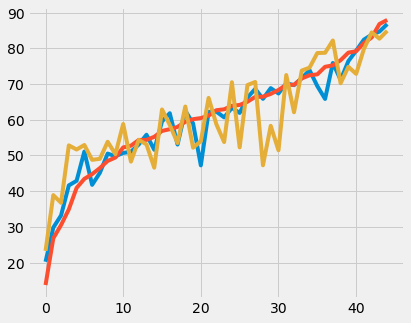

In [159]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(model_pred_val, label = "GB Predictions")
plt.plot(y_test, label = "GB Test")

plt.plot(Redused_lin_reg, label = "Redused_Lin_reg")
plt.plot(Lin_reg_simple_to_vis, label = "Referense-free Lin_reg")
plt.legend(fontsize=16)

ax.set_xlabel("Integral value V", fontsize=18)
ax.set_ylabel("MOS", fontsize=18)

#plt.xlabel('xlabel', fontsize=18)

ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)

In [160]:
def mae(y_true, y_pred):    
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model, X, y, X_test, y_test):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    
    #y_pred_val = model.predict(X_val)
    #model_mae = mae(y_test, model_pred)
    #model_mae = mae(y_test, y_val, model_pred, y_pred_val)
    model_mae = mae(y_test, model_pred)
    # Return the performance metric
    return model_mae

In [161]:
from sklearn.linear_model import Lasso
lr_lasso = Lasso(alpha=0.0031, tol = 1e-2)
lr_lasso.fit(X, y)
lr_mae_lasso = fit_and_evaluate(lr, X, y, X_test, y_test)

print('Linear Regression Performance: MAE test = %0.4f' % lr_mae_lasso)
model_pred = lr_lasso.predict(X_test)
model_pred_val = lr_lasso.predict(X_val)

Linear Regression Performance: MAE test = 5.1354


In [162]:
Lin_reg = np.dot(X_val, lr_lasso.coef_) + lr_lasso.intercept_

In [259]:
X_with_cols.columns[4]

'averageWeightedBitrate'

In [247]:
#Модель без лишнего
(X_with_cols.columns)

Index(['initial buffer time', 'Rebuffer count',
       'average duration of stalling event', 'mean(seqPSNR)',
       'averageWeightedBitrate', 'st_events_max', 'bitrate_pos_changes_count',
       'bitrate_neg_changes_count', 'bitrate_max_pos_change',
       'bitrate_max_neg_change', 'bitrate_mean_pos_change',
       'bitrate_mean_neg_change', 'freq_of_st', 'Bitrate switch count',
       'freq_of_sw', 'Rebuffer percentage',
       'Average Bitrate Swithcing magnitude',
       'Average relative Bitrate Swithcing magnitude',
       'Ratio on highest sequense quality layer',
       'Ratio on minimum sequense quality layer',
       'Ratio on sequense quality layer max/2', 'width*height', 'SI', 'TI',
       'Constant_bitrate', 'content_animals', 'content_animation',
       'content_architecture', 'content_food', 'content_game', 'content_human',
       'content_movie', 'content_natue', 'content_nature', 'content_screen',
       'content_sports', 'motion_average motion', 'motion_camera motion'

In [248]:
indices1 = (1,2,4, 5,7,9,11,12,13,14,15,16,17,18,19,21,24)

In [300]:
import random
from sklearn.linear_model import Lasso
data_all = pd.read_excel('Data_to_analys.xlsx', index_col=0)
categorical_subset = data_all[['content', 'motion', "Constant_bitrate"]]
#
categorical_subset = categorical_subset.drop (['content', 'motion'], axis = 1)
#

mos = data_all["MOS"]
numerical_subset = data_all.copy()
numerical_subset = numerical_subset.drop (["MOS", 'content', 'motion', "Constant_bitrate"], axis = 1)

#
numerical_subset = numerical_subset.drop (["initial buffer time", 'mean(seqPSNR)', 'bitrate_pos_changes_count', "bitrate_max_pos_change"], axis = 1)
numerical_subset = numerical_subset.drop (["bitrate_mean_pos_change", 'TI', 'SI', "Ratio on sequense quality layer max/2"], axis = 1)
#

#numerical_subset = numerical_subset.drop (["Constant_bitrate.1"], axis = 1)
#categorical_subset = pd.get_dummies(categorical_subset)
features = pd.concat([numerical_subset, categorical_subset], axis = 1)
features = pd.concat([features, data_all["MOS"]], axis = 1)

features = pd.concat([numerical_subset, categorical_subset], axis = 1)
targets = pd.DataFrame(data_all["MOS"])



#Попробуем без?

def transmutation(mos):
    return math.log(mos/(100-mos))

for index, row in targets.iterrows():
     value = transmutation(row['MOS'])
     #print (value)
     targets.at[index, 'MOS'] = value
    
#X, X_test, train_labels, test_labels = train_test_split(features, targets,test_size = 0.3,random_state = 42)

index_test =[]
index_val= []
for i in range(45):
    random.seed(42) 
    #print (10*i, 9 + 10*i)
    a = random.randint(10*i, 9 + 10*i)
    index_test.append (a)
    #random.seed(24) 
    while (a != 0):
        b = random.randint(10*i, 9 + 10*i)
        if (a!=b):
            a = 0
            index_val.append (b)

            #Стратифицированная выборка для регрессии
k=10
n = 45#450/k
k_folds = np.zeros((k,n))
#Отсортировать по MOS
sorted_features = pd.concat([features, targets], axis = 1)
sorted_features = sorted_features.sort_values(['MOS'])
sorted_features.set_index(np.arange(450) )

val = sorted_features.iloc [index_val]

targets = pd.DataFrame(sorted_features["MOS"])
sorted_features = sorted_features.drop (["MOS"], axis = 1)


X_ = sorted_features.drop(index_test)
X_ = X_.drop(index_val)
X_test_ = sorted_features.iloc [index_test]
X_val_ = sorted_features.iloc [index_val]

train_labels = targets.drop(index_test)
train_labels = train_labels.drop(index_val)
test_labels = targets.iloc [index_test]
val_labels = targets.iloc [index_val]


columns_save_ = sorted_features.columns

X_with_cols_ = pd.DataFrame(sorted_features, columns = columns_save_)

print (X_with_cols_.columns)

# Create the scaler object with a range of 0-1
#scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
#scaler.fit(X)

# Transform both the training and testing data
# X = scaler.transform(X)
# X_test = scaler.transform(X_test)
# X_val = scaler.transform(X_val)

X = np.array(X_)
X_test = np.array(X_test_)
X_val = np.array(X_val_)

# Sklearn wants the labels as one-dimensional vectors
y = np.array(train_labels).reshape((-1,))
y_test = np.array(test_labels).reshape((-1,))
y_val = np.array(val_labels).reshape((-1, ))

Index(['Rebuffer count', 'average duration of stalling event',
       'averageWeightedBitrate', 'st_events_max', 'bitrate_neg_changes_count',
       'bitrate_max_neg_change', 'bitrate_mean_neg_change', 'freq_of_st',
       'Bitrate switch count', 'freq_of_sw', 'Rebuffer percentage',
       'Average Bitrate Swithcing magnitude',
       'Average relative Bitrate Swithcing magnitude',
       'Ratio on highest sequense quality layer',
       'Ratio on minimum sequense quality layer', 'width*height',
       'Constant_bitrate'],
      dtype='object')


In [301]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [303]:
lr_lasso = Lasso(alpha=0.00003, tol = 2e-1)
lr_lasso.fit(X, y)
#lr_mae_lasso = fit_and_evaluate(lr, X, y, X_test, y_test)

#print('Linear Regression Performance: MAE test = %0.4f' % lr_mae_lasso)
model_pred = lr_lasso.predict(X_test)
model_pred_val = lr_lasso.predict(X_val)

print (mean_absolute_error(y_test, model_pred))
print (mean_absolute_error(y_val, model_pred_val))

print(spearmanr(model_pred, y_test))
print(spearmanr(model_pred_val, y_val))

0.2970735741153933
0.35027354409802086
SpearmanrResult(correlation=0.8148880105401843, pvalue=9.592652570426798e-12)
SpearmanrResult(correlation=0.7595520421607377, pvalue=1.4568018368305006e-09)


In [284]:
lr_lasso.coef_

array([-2.05510024e-01, -6.72342910e-02,  8.93771443e-05, -9.98022916e-02,
       -1.49407864e-02,  3.20278493e-06,  2.43995523e-04,  0.00000000e+00,
        3.87344376e-02,  0.00000000e+00, -0.00000000e+00,  1.36841548e-04,
       -1.43892436e-04,  0.00000000e+00, -1.12540172e+00,  4.96627821e-07,
        0.00000000e+00])

In [285]:
lr_lasso.intercept_

0.33221807572227036

In [286]:
print(spearmanr(lr_reduced_pred, y_test))
print(spearmanr(lr_reduced_pred_val, y_val))

SpearmanrResult(correlation=0.817786561264822, pvalue=7.047435070374485e-12)
SpearmanrResult(correlation=0.8243741765480895, pvalue=3.425420545210475e-12)


In [279]:
Lin_reg_simple = np.dot(X_val, lr_lasso.coef_) + lr_lasso.intercept_

In [281]:
j=0
for i in indices:
    print (round(lr_lasso.coef_[j],4), "*",X_with_cols.columns[i]) 
    j+=1

-0.2744 * Ratio on sequense quality layer max/2
-0.0137 * width*height
0.0001 * Ratio on minimum sequense quality layer
-0.0406 * averageWeightedBitrate
0.0002 * mean(seqPSNR)
-0.0001 * st_events_max
0.0004 * initial buffer time
1.7522 * Rebuffer percentage
0.0647 * Average Bitrate Swithcing magnitude
-0.0 * average duration of stalling event


In [282]:
# Keep only the most important features
X_reduced_ = X[:, indices1]
X_test_reduced_ = X_test[:, indices1]

X_val_reduced_ = X_val[:, indices1]

IndexError: index 17 is out of bounds for axis 1 with size 17

In [1181]:
j=0
for i in indices:
    print (round(lr.coef_[j],4), "*",X_with_cols.columns[i]) 
    j+=1

16.4768 * Ratio on sequense quality layer max/2
0.0 * width*height
0.0016 * averageWeightedBitrate
0.5419 * mean(seqPSNR)
-23.9681 * Ratio on minimum sequense quality layer
-49.6973 * Rebuffer percentage
5.5947 * freq_of_sw
-1.0141 * st_events_max
-0.0979 * initial buffer time
2.4193 * average duration of stalling event


In [1182]:
for coef in lr.coef_:
    print (round(coef,4))

16.4768
0.0
0.0016
0.5419
-23.9681
-49.6973
5.5947
-1.0141
-0.0979
2.4193


In [1152]:
lr.intercept_

34.20295845082266

Well, reducing the features did not improve the linear regression results! It turns out that the extra information in the features with low importance do actually improve performance. 

Let's look at using the reduced set of features in the gradient boosted regressor. How is the performance affected?

In [378]:
# Create the model with the same hyperparamters
model_reduced = GradientBoostingRegressor(loss='ls', max_depth=3, max_features='sqrt',
                                  min_samples_leaf=8, min_samples_split=10, 
                                  n_estimators=483, random_state=42)

# Fit and test on the reduced set of features
model_reduced.fit(X_reduced, y)
model_reduced_pred = model_reduced.predict(X_test_reduced)
model_reduced_pred_val = model_reduced.predict(X_val_reduced)

#print('Gradient Boosted Reduced Results: MAE test = %0.4f, MAE val = %0.4f' % mae(y_test, y_val, model_reduced_pred, model_reduced_pred_val))

 The model results are slightly worse with the reduced set of features and we will keep all of the features for the final model. The desire to reduce the number of features is because we are always looking to build the most [parsimonious model](http://www.statisticshowto.com/parsimonious-model/): that is, the simplest model with adequate performance. A model that uses fewer features will be faster to train and generally easier to interpret. In this case, keeping all of the features is not a major concern because the training time is not significant and we can still make interpretations with many features.

## Locally Interpretable Model-agnostic Explanations

We will look at using [LIME to explain individual predictions](https://github.com/marcotcr/lime) made the by the model. LIME is a relatively new effort aimed at showing how a machine learning model thinks by approximating the region around a prediction with a linear model.

We will look at trying to explain the predictions on an example the model gets very wrong and an example the model gets correct. We will restrict ourselves to using the reduced set of 10 features to aid interpretability. The model trained on the 10 most important features is slightly less accurate, but we generally have to trade off accuracy for interpretability!

In [379]:
# Find the residuals
residuals = abs(model_reduced_pred - y_test)
    
# Exact the worst and best prediction
wrong = X_test_reduced[np.argmax(residuals), :]
right = X_test_reduced[np.argmin(residuals), :]

In [380]:
wrong

array([1.00000000e+00, 2.07360000e+06, 4.14893000e+01, 0.00000000e+00,
       6.07320000e+03, 0.00000000e+00, 2.06670000e+00, 0.00000000e+00,
       8.28726992e-02, 0.00000000e+00])

In [381]:
right

array([2.00000000e-01, 2.22859000e+05, 3.05988000e+01, 0.00000000e+00,
       8.29200000e+02, 0.00000000e+00, 1.16670000e+00, 0.00000000e+00,
       3.58207886e-01, 0.00000000e+00])

In [382]:
# LIME for explaining predictions
import lime 
import lime.lime_tabular

In [383]:
# Create a lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_reduced, 
                                                   mode = 'regression',
                                                   training_labels = y,
                                                   feature_names = list(most_important_features))

Prediction: 91.9880
Actual Value: 77.1066


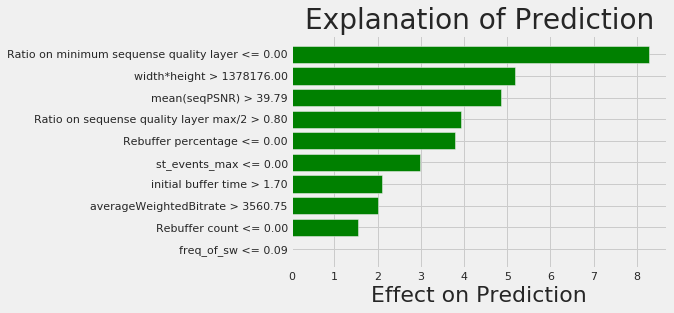

In [384]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = model_reduced.predict)

# Plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In this example, our gradient boosted model predicted a score of 12.86 and the actual value was 100. 

The plot from LIME is showing us the contribution to the final prediction from each of the features for the example. We can see that the Site EUI singificantly decreased the prediction because it was above 95.50. The Weather Normalized Site Electricity Intensity on the other hand, increased the prediction because it was lower than 3.80. 

We can interpret this as saying that our model thought the Energy Star Score would be much lower than it actually was because the Site EUI was high. However, in this case, the score was 100 despite the high value of the EUI. While this significant mistake (off by 88 points!) might initially have been confusing, now we can see that in reality, the model was reasoning through the problem and just arrived at the incorrect value! A human going over the same process probably would have arrived at the same conclusion (if they had the patience to go through all the data). 

Now we can go through the same process with a prediction the model got correct.

In [334]:
wrong_exp.show_in_notebook(show_predicted_value=False)

Prediction: 56.5448
Actual Value: 56.5061


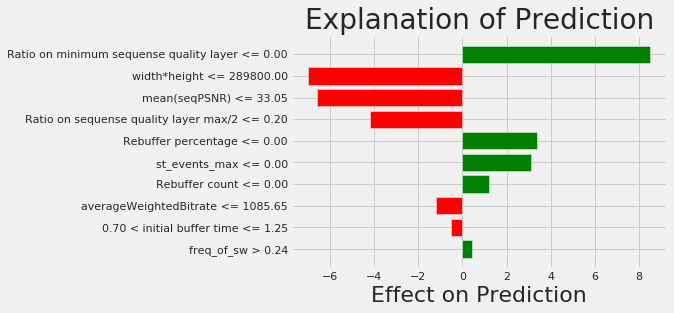

In [335]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for wrong prediction
right_exp = explainer.explain_instance(right, model_reduced.predict, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [336]:
right_exp.show_in_notebook(show_predicted_value=False)

In [337]:
#0.1739 = log(mos/(100-mos))
#exp (0.1739) = mos/(100-mos)
#100* exp (0.1739)-mos* exp (0.1739) = mos
#100* exp (0.1739) = mos (1+exp (0.1739))
#mos = 100* exp (0.1739) / ((1+exp (0.1739))
mos = 100 / (1+math.exp (-0.1739))

In [338]:
mos

54.336576893234806


The plot from LIME again shows the contribution to the prediciton of each of feature variables for the example. For instance, because the Site EUI was less than 62.70, that contributed significantly to a higher estimate of the score. Likewise, the year built being less than 1927 also positively contributed to the final prediction. 

Observing break down plots like these allow us to get an idea of how the model makes a prediction. This is probably most valuable for cases where the model is off by a large amount as we can inspect the errors and perhaps engineer better features or adjust the hyperparameters of the model to improve predictions for next time. The examples where the model is off the most could also be interesting edge cases to look at manually. The model drastically underestimated the Energy Star Score for the first building because of the elevated Site EUI. We might therefore want to ask why the building has such a high Energy Star Score even though it has such a high EUI. A process such as this where we try to work with the machine learning algorithm to gain understanding of a problem seems much better than simply letting the model make predictions and completely trusting them! Although LIME is not perfect, it represents a step in the right direction towards explaining machine learning models. 

# Examining a Single Decision Tree

One of the coolest parts about a tree-based ensemble is that we can look at any individual estimator. Although our final model is composed of 800 decision trees, and looking at a single one is not indicative of the entire model, it still allows us to see the general idea of how a decision tree works. From there, it is a natural extension to imagine hundreds of these trees [building off the mistakes of previous trees](https://medium.com/mlreview/gradient-boosting-from-scratch-1e317ae4587d) to make a final prediction (this is a significant oversimplification of how [gradient boosting regression works!](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html))

We will first extract a tree from the forest and then save it using `sklearn.tree.export_graphviz`. This saves the tree as a `.dot` file which can be converted to a png using command line instructions in the Notebook.

In [374]:
# Extract a single tree
from sklearn import tree
#single_tree = model_reduced.estimators_[105][0]

single_tree = model_reduced.estimators_[90][0]


tree.export_graphviz(single_tree, out_file = 'tree.dot',
                     rounded = True, 
                     feature_names = most_important_features,
                     filled = True)

single_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=3,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=8, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=RandomState(MT19937) at 0x7FA718641380,
                      splitter='best')

In [375]:
!dot -Tpng tree.dot -o tree.png

In [376]:
![title](tree.png)

/bin/sh: 1: Syntax error: word unexpected (expecting ")")


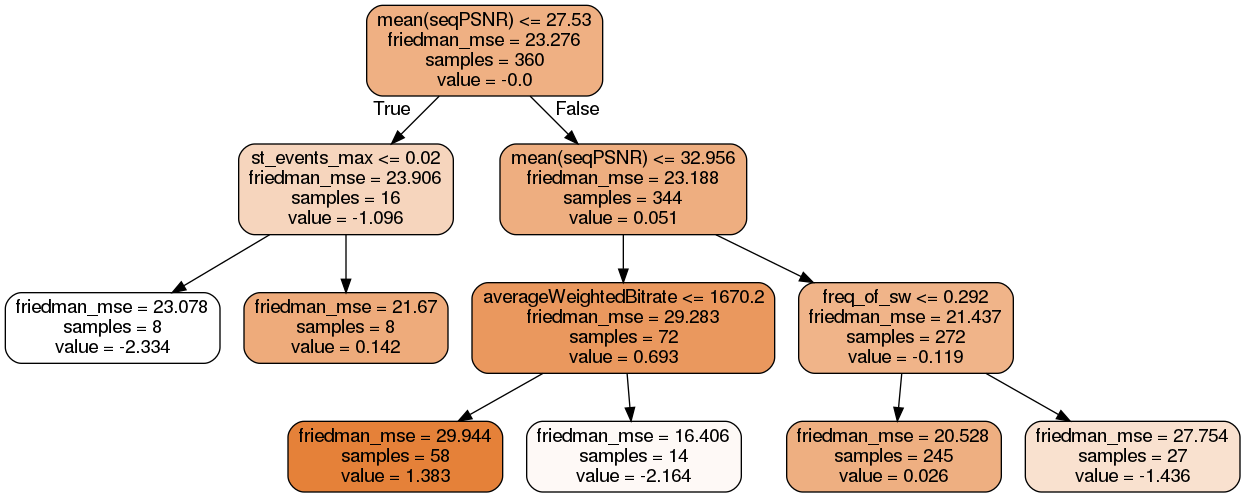

In [377]:
from IPython.display import Image
Image(filename='tree.png')

That's one entire tree in our regressor of 800! It's a little difficult to make out because the maximum depth of the tree is 5. To improve the readability, we can limit the max depth in the call to export our tree.

In [343]:
tree.export_graphviz(single_tree, out_file = 'tree_small.dot',
                     rounded = True, feature_names = most_important_features,
                     filled = True, max_depth = 3)

In [344]:
!dot -Tpng tree_small.dot -o tree_small.png

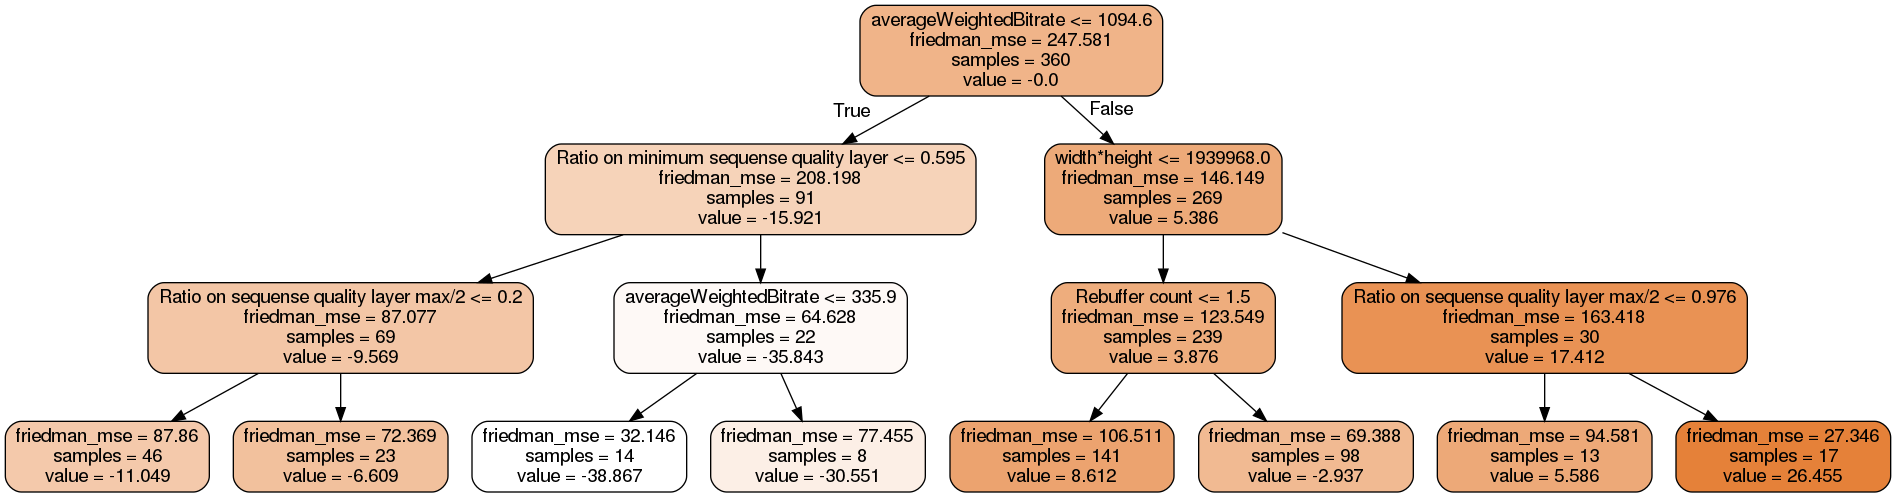

In [345]:
from IPython.display import Image
Image(filename='tree_small.png')

Now we can take a look at the tree and try to intrepret it's decisions! The best way to think of a decision tree is as a series of yes/no questions, like a flowchart. We start at the top, called the root, and move our way down the tree, with the direction of travel determined by the answer to each equation.

For instance, here the first question we ask is: is the `Site EUI` less than or equal to 15.95? If the answer is yes, then we move to the left and ask the question: is the `Weather Normalized Site Electricity Intensity` less than or equal to 3.85? If the answer to the first question was no, we move to the right and ask the question is the `Weather Normalized Site Electricity Intensity` less than or equal to 26.85? 

We continue this iterative process until we reach the bottom of the tree and end up in a leaf node. Here, the value we predict corresponds to the value shown in the node (the values in this tree appear to be the actual predictions divided by 100). 

Each node has four different pieces of information:

1. The question: based on this answer we move right or left to the next node a layer down in the tree
2. The friedman_mse: a measure of the error for all of the examples in a given node
3. The samples: number of examples in a node
4. The value: the prediction of the target for all examples in a node

We can see that as we increase the depth of the tree, we will be better able to fit the data. With a small tree, there will be many examples in each leaf node, and because the model estimates the same value for each example in a node, there will probably be a larger error (unless all of the examples have the same target value). Constructing too large of a tree though can lead to overfitting. We can control a number of hyperparameters that determine the depth of the tree and the number of examples in each leaf. We saw how to select a few of these hyperaparameters in the second part when we performed optimimation using cross validation. 

Although we clearly cannot examine every tree in our model, looking at a single one does give us some idea how our model makes predictions. In fact, this flowchart based method seems much like how a human makes decisions, answering one question about a single value at a time. Decision tree based ensembles simply take the idea of a single decision tree and combine the predictions of many individuals in order to create a model with less variance than a single estimator. Ensembles of trees tend to be very accurate, and also are intuitive to explain! 

# Make Conclusions and Document Findings

The final part of the machine learning pipeline might be the most important: we need to compress everything we have learned into a short summary highlighting only the most crucial findings. Personally, I have difficulty avoiding explaining all the technical details because I enjoy all the work. However, the person you're presenting to probably doesn't have much time to listen to all the details and just wants to hear the takeaways. Learning to extract the most important elements of data science or machine learning project is a crucial skill, because if our results aren't understood by others, then they will never be used! 

I encourage you to come up with your own set of conclusions, but here are my top 2 designed to be communicated in 30 seconds:

1. Using the given building energy data, a machine learning model can predict the Energy Star Score of a building to within 10 points. 
2. The most important variables for determining the Energy Star Score are the Energy Use Intensity, Electricity Use Intensity, and the Water Use Intensity

If anyone asks for the details, then we can easily explain all the implementation steps, and present our (hopefully) well-documented work. Another crucial aspect of a machine learning project is that you have commented all your code and made it easy to follow! You want someone else (or yourself in a few months) to be able to look at your work and completely understand the decisions you made. Ideally you should write code with the intention that it will be used again. Even when we are doing projects by ourselves, it's good to practice proper documentation and it will make your life much easier when you want to revisit a project. 

## Presenting your Work

One of the best aspects about Jupyter Notebooks is that they can be directly downloaded as a pdf or html and then shared with others. This project was originally an "assignment" given to me by a company as an evaluation for a data science position (I was offered the job, but then the CTO of the company quit so they couldn't take anyone on for a while!). My final report [can be seen here](https://github.com/WillKoehrsen/machine-learning-project/blob/master/Building%20Data%20Report.pdf) (it differs from this project a little because I did it in a compressed time frame and made some different modeling choices). After finishing up the Jupyter Notebook, I downloaded it as `.tex`, made a few small changes in [texStudio](https://www.texstudio.org/), and then compiled it to a pdf. The final version looks a little better than the default Jupyter Notebook pdf and it's wortwhile to learn a little [latex](https://www.latex-project.org/) to create more professional reports! 

With that in mind, I think it's time for us to wrap up this project! I had a great time writing these notebooks and doing the analysis, and I hope you enjoyed reading this and now feel more confident in implementing your own machine learning project. If you want, you can start by modifying this project and trying to beat my models! Remember, don't feel like you have to go it alone: there are plenty of amazing machine learning resources out there, and coming from someone who is entirely self-taught thanks to the great data science community, the best way to learn is to get involved and start putting your work out there! 

Resources for data science and machine learning:

* [Hands-On Machine Learning with Scikit-Learn and Tensorflow](http://shop.oreilly.com/product/0636920052289.do)
    * [Jupyter Notebooks for this book](https://github.com/ageron/handson-ml) are available online for free!
* [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)
* [Kaggle: The Home of Data Science and Machine Learning](https://www.kaggle.com/)
* [Datacamp: Good Beginner Tutorials for Practicing Coding with a Focus on Data Science](https://www.datacamp.com/)
* [Dataquest: Hands on Lessons for Data Science Programming](https://www.dataquest.io/)

## Обучим правильный линейный регрессор

In [752]:
data_all = pd.read_excel('Data_to_analys.xlsx', index_col=0)
categorical_subset = data_all[['content', 'motion', "Constant_bitrate"]]
mos = data_all["MOS"]
numerical_subset = data_all.copy()
numerical_subset = numerical_subset.drop (["MOS", 'content', 'motion', "Constant_bitrate"], axis = 1)
numerical_subset = numerical_subset.drop (["Constant_bitrate.1"], axis = 1)
categorical_subset = pd.get_dummies(categorical_subset)
features = pd.concat([numerical_subset, categorical_subset], axis = 1)
features = pd.concat([features, data_all["MOS"]], axis = 1)
features = remove_collinear_features(features, 0.6) #Взаимная коррелляция > 0.6
features = pd.concat([numerical_subset, categorical_subset], axis = 1)
targets = pd.DataFrame(data_all["MOS"])

#Попробуем без 
for index, row in targets.iterrows():
     value = transmutation(row['MOS'])
     #print (value)
     targets.at[index, 'MOS'] = value
    
X, X_test, train_labels, test_labels = train_test_split(features, targets,test_size = 0.3,random_state = 42)
columns_save = features.columns
X_with_cols = pd.DataFrame(X, columns = columns_save)


index_test =[]
index_val= []
for i in range(45):
    #random.seed(42) 
    #print (10*i, 9 + 10*i)
    a = randint(10*i, 9 + 10*i)
    index_test.append (a)
    #random.seed(24) 
    while (a != 0):
        b = randint(10*i, 9 + 10*i)
        if (a!=b):
            a = 0
            index_val.append (b)

            #Стратифицированная выборка для регрессии
k=10
n = 45#450/k
k_folds = np.zeros((k,n))
#Отсортировать по MOS
sorted_features = pd.concat([features, targets], axis = 1)
sorted_features = sorted_features.sort_values(['MOS'])
sorted_features.set_index(np.arange(450) )

val = sorted_features.iloc [index_val]

targets = pd.DataFrame(sorted_features["MOS"])
sorted_features = sorted_features.drop (["MOS"], axis = 1)

X = sorted_features.drop(index_test)
X = X.drop(index_val)
X_test = sorted_features.iloc [index_test]
X_val = sorted_features.iloc [index_val]

train_labels = targets.drop(index_test)
train_labels = train_labels.drop(index_val)
test_labels = targets.iloc [index_test]
val_labels = targets.iloc [index_val]





# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Sklearn wants the labels as one-dimensional vectors
y = np.array(train_labels).reshape((-1,))
y_test = np.array(test_labels).reshape((-1,))
y_val = np.array(val_labels).reshape((-1, ))

In [753]:
print(X.shape)
print(X_test.shape)
print(X_val.shape)
print(train_labels.shape)
print(test_labels.shape)
print(val_labels.shape)


print (y.shape)

(360, 44)
(45, 44)
(45, 44)
(360, 1)
(45, 1)
(45, 1)
(360,)


In [754]:
lr = LinearRegression()

# Fit on full set of features
lr.fit(X, y)
lr_full_pred = lr.predict(X_test)
lr_full_pred_val = lr.predict(X_val)

# Fit on reduced set of features
lr.fit(X_reduced, y)
lr_reduced_pred = lr.predict(X_test_reduced)
lr_reduced_pred_val = lr.predict(X_val_reduced)


# Display results
#print('Linear Regression Full Results: MAE =    %0.4f.' % mae(y_test, lr_full_pred))
#print('Linear Regression Reduced Results: MAE = %0.4f.' % mae(y_test, lr_reduced_pred))
mae(y_test, y_val, lr_full_pred, lr_full_pred_val)
print('Linear Regression Full Results: MAE test = %0.4f, MAE val = %0.4f' % mae(y_test, y_val, lr_full_pred, lr_full_pred_val))
print('Linear Regression Full Results: MAE test = %0.4f, MAE val = %0.4f' % mae(y_test, y_val, lr_reduced_pred, lr_reduced_pred_val))

Linear Regression Full Results: MAE test = 0.2196, MAE val = 0.2677
Linear Regression Full Results: MAE test = 0.2736, MAE val = 0.3492


In [755]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [756]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [757]:
X_train = X; y_train =y

In [758]:
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_absolute_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_absolute_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

0.47790773031411404
0.8471285992294814
0.46857346432431285
0.8481950699214795


In [759]:
train_er = []
test_er = []
alpha = np.linspace(0.0001, 0.1, num = 10000)
for alp in alpha:

    rr = Ridge(alpha=alp)
    rr.fit(X_train, y_train) 
    pred_train_rr= rr.predict(X_train)
    train_er.append (mean_absolute_error(y_train,pred_train_rr))
#     print(np.sqrt(mean_absolute_error(y_train,pred_train_rr)))
#     print(r2_score(y_train, pred_train_rr))

    pred_test_rr= rr.predict(X_test)
    test_er.append (mean_absolute_error(y_test,pred_test_rr))
#     print(np.sqrt(mean_absolute_error(y_test,pred_test_rr))) 
#     print(r2_score(y_test, pred_test_rr))

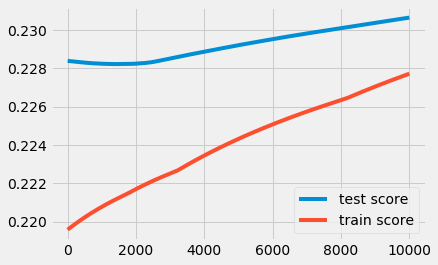

In [760]:
plt.plot(train_er)
plt.plot(test_er)
#plt.plot(val_score)
plt.legend(['test score', 'train score'])

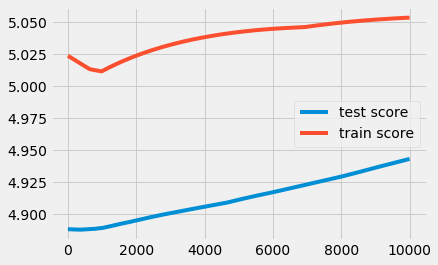

In [733]:
plt.plot(train_er)
plt.plot(test_er)
#plt.plot(val_score)
plt.legend(['test score', 'train score'])

In [761]:
train_er = []
test_er = []
alpha = np.linspace(0.00001, 0.1, num = 1000)
for alp in alpha:

    model_lasso = Lasso(alpha=alp, tol = 1e-1)
    model_lasso.fit(X_train, y_train) 
    pred_train= model_lasso.predict(X_train)
    train_er.append (mean_absolute_error(y_train,pred_train))

    pred_test= rr.predict(X_test)
    test_er.append (mean_absolute_error(y_test,pred_test))

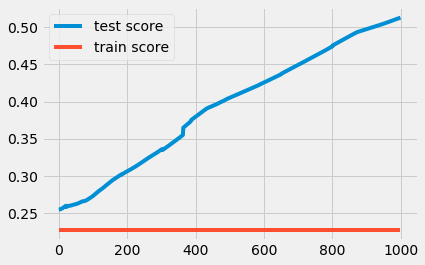

In [762]:
plt.plot(train_er)
plt.plot(test_er)
#plt.plot(val_score)
plt.legend(['test score', 'train score'])

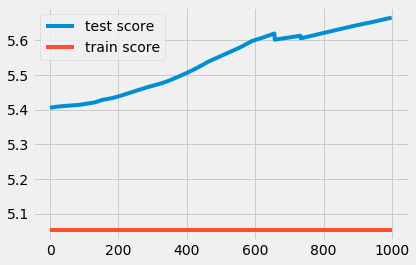

In [743]:
plt.plot(train_er)
plt.plot(test_er)
#plt.plot(val_score)
plt.legend(['test score', 'train score'])

In [763]:
train_er = []
test_er = []
alpha = np.linspace(0.00001, 0.1, num = 1000)
for alp in alpha:
    model_enet = ElasticNet(alpha = alp,tol = 1e-2)
    model_enet.fit(X_train, y_train) 
    pred_train_enet= model_enet.predict(X_train)
    train_er.append (mean_absolute_error(y_train,pred_train_enet))
    

    pred_test_enet= model_enet.predict(X_test)
    test_er.append (mean_absolute_error(y_test,pred_test_enet))
    

/home/ksant/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.359334148059956, tolerance: 1.9333841859955094
  positive)
/home/ksant/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7900763513275493, tolerance: 1.9333841859955094
  positive)


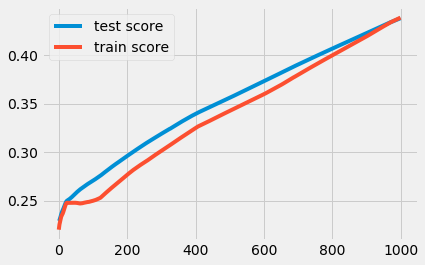

In [764]:
plt.plot(train_er)
plt.plot(test_er)
#plt.plot(val_score)
plt.legend(['test score', 'train score'])

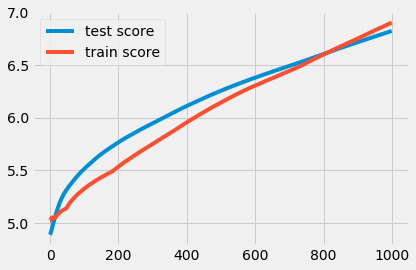

In [751]:
plt.plot(train_er)
plt.plot(test_er)
#plt.plot(val_score)
plt.legend(['test score', 'train score'])

In [766]:
import itertools as itr


In [ ]:


for params_number in range (1, 4):
    combs = [comb for comb in itr.combinations(range(0, 44), params_number)]

    err = 0
    indices = []
    for comb in combs:
        variables = data.iloc[:, comb]
        lr = LinearRegression()
        lr.fit(X, y)
        pred_train_enet= lr.predict(X_train)
        err_t =  (mean_absolute_error(y_train,pred_train_enet))
        if err_t > err:
            err = err_t
            indices = comb

In [780]:
for params_number in range (1, 4):
    print(params_number)
    combs = [comb for comb in itr.combinations(range(0, 4), params_number)]
    

1
2
3


In [779]:
combs = [comb for comb in itr.combinations(range(0, 5), 1)]
combs

[(0,), (1,), (2,), (3,), (4,)]

In [320]:
#2) Спирман с перемножениями признаков

In [321]:
#3) ANOVA???

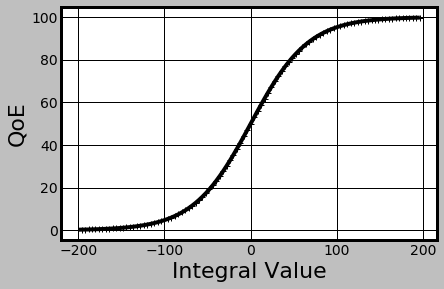

In [86]:
#Гипотеза с сигмоидой
x = np.arange(-200, 200, 4).tolist()
y = []

b1 = 100 #Масштабирующий коэффициент, константа
b2 = -0.03 #Коэффициент наклона, тоже вносится в веса
b3 = 200 #Смещение вдоль оси Ox, вносится в сам X. x = summ (w.i * xi) - тут какой-то полином. b3 - свободный член
#sigma = b1/(b2 + b3*exp(-x))
def sigma(x):
    sigma = 100/(1 + math.exp(b2*(x)))
   
    return sigma

y= list (map(lambda x : sigma(x), x))

fig, ax = plt.subplots()
ax.plot(x, y, '+', linestyle='solid')

plt.xlabel('Integral Value', size = 22);
plt.ylabel('QoE', size = 22);

plt.show()

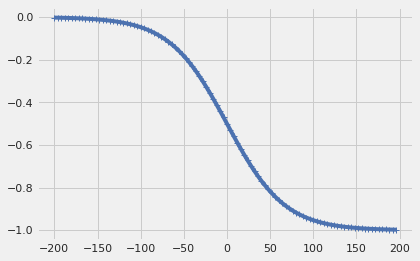

In [448]:
#Гипотеза с сигмоидой
x = np.arange(-200, 200, 4).tolist()
y = []

b1 = 100 #Масштабирующий коэффициент, константа
b2 = -0.03 #Коэффициент наклона, тоже вносится в веса
b3 = -0 #Смещение вдоль оси Ox, вносится в сам X. x = summ (w.i * xi) - тут какой-то полином. b3 - свободный член
#sigma = b1/(b2 + b3*exp(-x))
def sigma(x):
    sigma = -1/(1 + math.exp(b2*(x)))
   
    return sigma

y= list (map(lambda x : sigma(x), x))

fig, ax = plt.subplots()
ax.plot(x, y, 'b+', linestyle='solid')
plt.show()

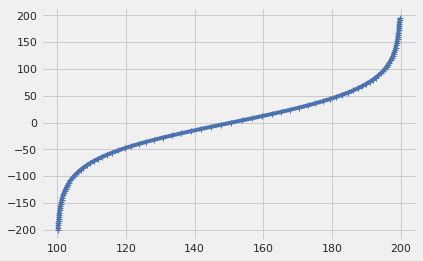

In [445]:
#Гипотеза с сигмоидой
x = np.arange(-200, 200, 4).tolist()
y = []

b1 = 100 #Масштабирующий коэффициент, константа
b2 = -0.03 #Коэффициент наклона, тоже вносится в веса
b3 = 1 #Смещение вдоль оси Ox, вносится в сам X. x = summ (w.i * xi) - тут какой-то полином. b3 - свободный член
#sigma = b1/(b2 + b3*exp(-x))
def sigma(x):
    sigma = -b1/(1 + math.exp(b2*(-x-b3))) + 200
   
    return sigma

y= list (map(lambda x : sigma(x), x))

fig, ax = plt.subplots()
ax.plot(y, x, 'b+', linestyle='solid')
plt.show()

In [455]:
#Гипотеза с сигмоидой
y = np.arange(-100, -10, 1).tolist()
x = []

b1 = 100 #Масштабирующий коэффициент, константа
b2 = -0.03 #Коэффициент наклона, тоже вносится в веса
b3 = 1 #Смещение вдоль оси Ox, вносится в сам X. x = summ (w.i * xi) - тут какой-то полином. b3 - свободный член
#sigma = b1/(b2 + b3*exp(-x))
def sigma(y):
    sigma = math.log((1-y)/y)
   
    return sigma

x= list (map(lambda y : sigma(y), y))

fig, ax = plt.subplots()
ax.plot(x, y, 'b+', linestyle='solid')
plt.show()

ValueError: math domain error

In [416]:
#Гипотеза с сигмоидой
x = np.arange(1, 10, 1).tolist()
y = []

b1 = 100 #Масштабирующий коэффициент, константа
b2 = -0.03 #Коэффициент наклона, тоже вносится в веса
b3 = -0 #Смещение вдоль оси Ox, вносится в сам X. x = summ (w.i * xi) - тут какой-то полином. b3 - свободный член
#sigma = b1/(b2 + b3*exp(-x))
def sigma(x):
    sigma = math.log(10*(1-x)/x)
   
    return sigma

y= list (map(lambda x : sigma(x), x))

fig, ax = plt.subplots()
ax.plot(x, y, 'b+', linestyle='solid')
plt.show()

ValueError: math domain error

In [335]:
#Обновляем значения MOS, т.е. значения y
def transmutation(mos):
    return math.log(mos/(100-mos))

In [337]:
full["mos_trans"] = np.nan
for index, row in full.iterrows():
    
    value = transmutation(row['MOS'])
    #print (value)
    full.at[index, 'mos_trans'] = value

In [ ]:
#Рекурсивное исключение признаков
#Метод рекурсивного исключения признаков (recursive feature elimination, RFE) реализует следующий алгоритм: 
#модель обучается на исходном наборе признаков и оценивает их значимость, затем исключается один или несколько
#наименее значимых признаков, модель обучается на оставшихся признаках, и так далее, пока не останется 
#заданное количество лучших признаков. В документации scikit-learn вы можете подробнее прочитать о классе RFE.

In [338]:
#array = features.values
#Пока что только с числовыми данными поработаем
array = numerical.values
mos_transm = full['mos_trans'].copy()
numerical.head(1)
mos_transm

0     -0.782553
1      0.040254
2     -0.042086
3      0.336891
4      0.524388
         ...   
445    0.179822
446    1.177235
447    0.978550
448    0.397481
449    1.984876
Name: mos_trans, Length: 450, dtype: float64

In [356]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)

import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression


X = numerical.copy().values
Y = mos_transm.values

# feature extraction

model = LinearRegression()

rfe = RFE(model, 4)

fit = rfe.fit(X, Y)



In [376]:
numerical.columns

Index(['duration of initial buffering', 'number of stalling events',
       'average duration of stalling event', 'mean(seqPSNR)',
       'averageWeightedBitrate', 'st_events_max', 'bitrate_pos_changes_count',
       'bitrate_neg_changes_count', 'bitrate_max_pos_change',
       'bitrate_max_neg_change', 'bitrate_med_pos_change',
       'bitrate_med_neg_change', 'freq_of_st', 'swithcingBitrateNumber',
       'freq_of_sw', 'Rebuffer percentage', 'averageBitrateSwithcing', 'Ph',
       'width*height', 'SI', 'TI'],
      dtype='object')

In [357]:
print("Num Features: %d"% (fit.n_features_))

print("Selected Features: %s" % (fit.support_))

print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 4
Selected Features: [False False False False False False False False False False False False
  True  True  True  True False False False False False]
Feature Ranking: [ 8  2  5  6 12  7  4  3 17 16 15 14  1  1  1  1 13  9 18 10 11]


/home/ksant/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


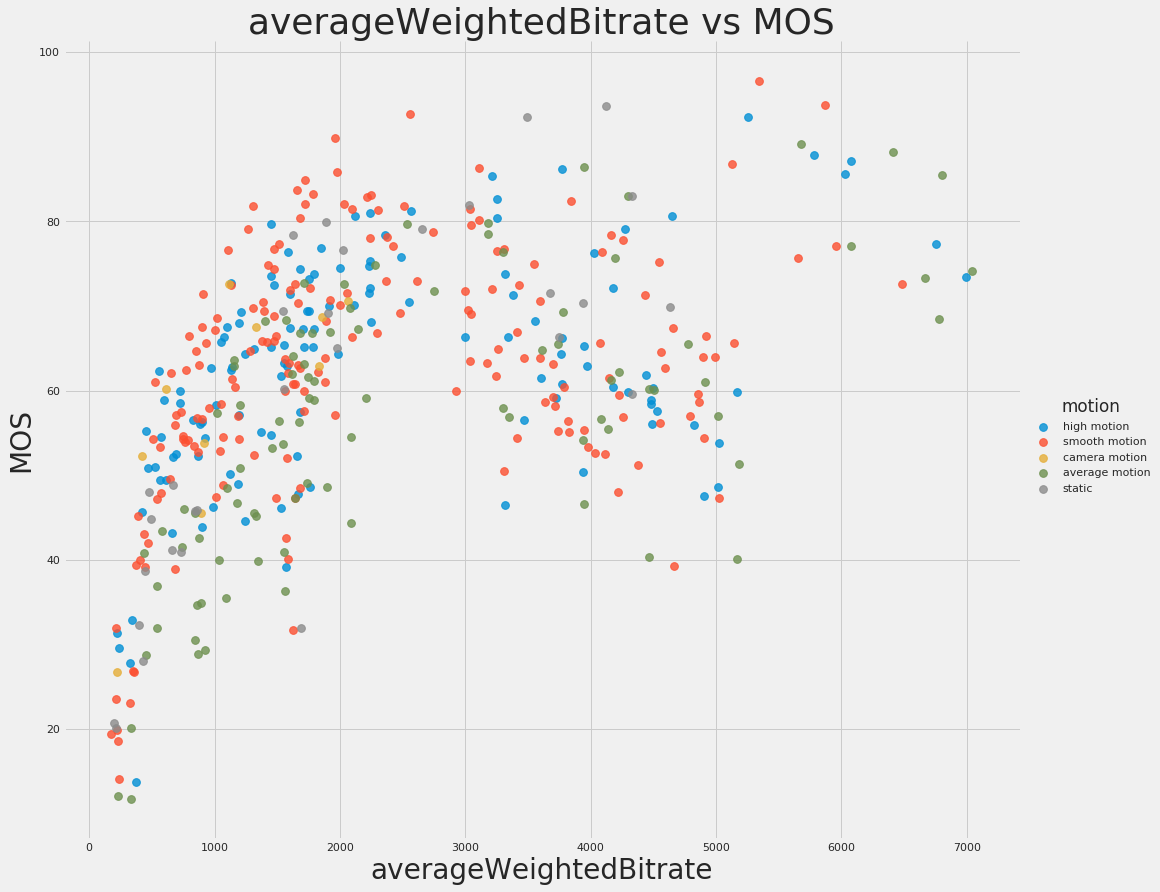

In [717]:
figsize(8, 6)
plt.style.use('fivethirtyeight')
# Extract the building types
features['motion'] = data_all.dropna(subset = ['MOS'])['averageWeightedBitrate']
#features = data_all['content']
# Limit to building types with more than 100 observations (from previous code)
#features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('averageWeightedBitrate', 'MOS', 
          hue = 'motion', data = data_all,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("averageWeightedBitrate", size = 28)
plt.ylabel('MOS', size = 28)
plt.title('averageWeightedBitrate vs MOS', size = 36);

In [353]:
len (numerical.columns)

21

In [373]:
fit.ranking_[-9]

1

In [374]:
numerical.iloc[:, [-9, -8, -7, -6]]

freq_of_st  swithcingBitrateNumber  freq_of_sw  Rebuffer percentage
0      0.213777                     0.0    0.000000             0.287409
1      0.000000                     3.0    0.284811             0.050633
2      0.000000                     3.0    0.280374             0.065421
3      0.000000                     2.0    0.194805             0.025974
4      0.000000                     3.0    0.294118             0.019608
..          ...                     ...         ...                  ...
445    0.080906                     1.0    0.080906             0.190939
446    0.091575                     2.0    0.183150             0.084249
447    0.000000                     1.0    0.089286             0.107143
448    0.193798                     4.0    0.193798             0.515504
449    0.083056                     1.0    0.083056             0.169435

[450 rows x 4 columns]

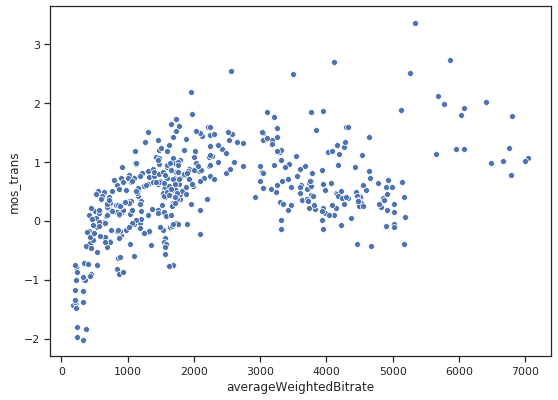

In [381]:
ax = sns.scatterplot(x="averageWeightedBitrate", y="mos_trans", ci=None, data=full)

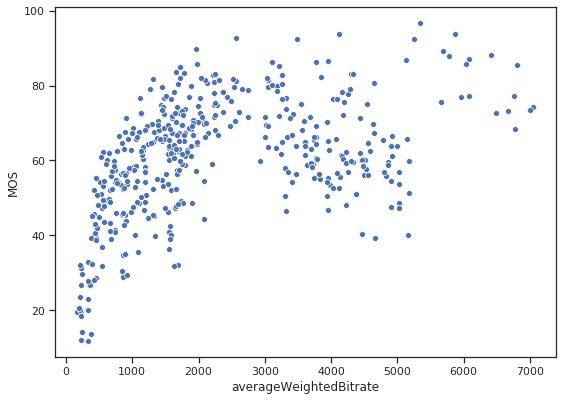

In [382]:
ax = sns.scatterplot(x="averageWeightedBitrate", y="MOS", ci=None, data=data)

In [383]:
print(spearmanr(full['mos_trans'], full['averageWeightedBitrate']))

SpearmanrResult(correlation=0.5117544744965612, pvalue=2.104233520927237e-31)


In [384]:
print(spearmanr(full['MOS'], full['averageWeightedBitrate']))

SpearmanrResult(correlation=0.5117544744965612, pvalue=2.104233520927237e-31)


In [73]:
#Перебор всех комбинаций 32^2 - 1
#А ещё можно заложить квадраты и перемножения!
from itertools import*
#combinations_with_replacement('ABCD', 2) --> AA AB AC AD BB BC BD CC CD DD
ad = ["A","BCD"]
a = combinations_with_replacement("ABCDEF", 2)
for i in a:
    print (i)

('A', 'A')
('A', 'B')
('A', 'C')
('A', 'D')
('A', 'E')
('A', 'F')
('B', 'B')
('B', 'C')
('B', 'D')
('B', 'E')
('B', 'F')
('C', 'C')
('C', 'D')
('C', 'E')
('C', 'F')
('D', 'D')
('D', 'E')
('D', 'F')
('E', 'E')
('E', 'F')
('F', 'F')


In [74]:
from itertools import combinations_with_replacement 
  
def rSubset(arr, r): 
  
    # return list of all subsets of length r 
    # to deal with duplicate subsets use  
    # set(list(combinations(arr, r))) 
    l = combinations_with_replacement(arr, r)
    f = open('text.txt', 'w')
    for index in l:
        f.write(str(index) + '\n')
    f.close()
    return 0

In [75]:
#rSubset(data.columns, 1)

In [76]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

#encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(data["content", "motion"]))
encoded_categorical_columns = onehot_encoder.fit_transform(np.array(data["content"]).reshape(-1, 1))
tmp = pd.DataFrame(encoded_categorical_columns, columns=["content" + str(i) 
                                                         for i in range (encoded_categorical_columns.shape[1])])
tmp.head()

data = pd.concat([data, tmp], axis = 1)
data.head()

stallTime  duration  duration of initial buffering  \
0    4.03330   14.0333                        1.80000   
1    0.53333   10.5333                        0.53333   
2    0.70000   10.7000                        0.70000   
3    0.26667   10.2667                        0.26667   
4    0.20000   10.2000                        0.20000   

   number of stalling events  average duration of stalling event  \
0                          3                             0.74444   
1                          0                             0.00000   
2                          0                             0.00000   
3                          0                             0.00000   
4                          0                             0.00000   

   mean(seqPSNR)        MOS  averageWeightedBitrate    SI    TI  ... content1  \
0        27.5826  31.376990                   222.0  96.0  97.0  ...      1.0   
1        29.5138  51.006205                   527.6  96.0  97.0  ...      1.0   
2        31.7743  48.948009                  1186.8  96.0  97.0  ...      1.0   
3        31.0625  58.343500                  1014.8  96.0  97.0  ...      1.0   
4        31.2189  62.817322                  1140.0  96.0  97.0  ...      1.0   

  content2  content3  content4  content5  content6  content7  content8  \
0      0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0       0.0       0.0       0.0       0.0       0.0       0.0   

   content9  content10  
0       0.0        0.0  
1       0.0        0.0  
2       0.0        0.0  
3       0.0        0.0  
4       0.0        0.0  

[5 rows x 42 columns]

In [77]:
onehot_encoder = OneHotEncoder(sparse=False)

#encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(data["content", "motion"]))
encoded_categorical_columns = onehot_encoder.fit_transform(np.array(data["motion"]).reshape(-1, 1))
tmp = pd.DataFrame(encoded_categorical_columns, columns=["motion" + str(i) 
                                                         for i in range (encoded_categorical_columns.shape[1])])
tmp.head()

data = pd.concat([data, tmp], axis = 1)
data.head()

stallTime  duration  duration of initial buffering  \
0    4.03330   14.0333                        1.80000   
1    0.53333   10.5333                        0.53333   
2    0.70000   10.7000                        0.70000   
3    0.26667   10.2667                        0.26667   
4    0.20000   10.2000                        0.20000   

   number of stalling events  average duration of stalling event  \
0                          3                             0.74444   
1                          0                             0.00000   
2                          0                             0.00000   
3                          0                             0.00000   
4                          0                             0.00000   

   mean(seqPSNR)        MOS  averageWeightedBitrate    SI    TI  ... content6  \
0        27.5826  31.376990                   222.0  96.0  97.0  ...      0.0   
1        29.5138  51.006205                   527.6  96.0  97.0  ...      0.0   
2        31.7743  48.948009                  1186.8  96.0  97.0  ...      0.0   
3        31.0625  58.343500                  1014.8  96.0  97.0  ...      0.0   
4        31.2189  62.817322                  1140.0  96.0  97.0  ...      0.0   

  content7  content8  content9  content10  motion0  motion1  motion2  motion3  \
0      0.0       0.0       0.0        0.0      0.0      0.0      1.0      0.0   
1      0.0       0.0       0.0        0.0      0.0      0.0      1.0      0.0   
2      0.0       0.0       0.0        0.0      0.0      0.0      1.0      0.0   
3      0.0       0.0       0.0        0.0      0.0      0.0      1.0      0.0   
4      0.0       0.0       0.0        0.0      0.0      0.0      1.0      0.0   

   motion4  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  

[5 rows x 47 columns]

In [78]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================
    #A = np.dot(X.T,X)
    #print (A)
    #B = np.linalg.pinv(A)
    #print (B)
    #C = np.dot (B,X.T)
    #theta = np.dot (C,y)
    #x_transpose = np.transpose(X)   #calculating transpose
    #x_transpose_dot_x = x_transpose.dot(X)  # calculating dot product
    #print (x_transpose_dot_x)
    #temp_1 = np.linalg.inv(x_transpose_dot_x) #calculating inverse
    #print(temp_1)
    #temp_2 = x_transpose.dot(y)  
    #theta = temp_1.dot(temp_2)
    # =================================================================
    inv = np.linalg.pinv(np.dot(X.T, X))
    theta = np.dot(np.dot(inv, X.T), y)
    
    return theta

In [139]:
#Иные варианты переключений битрейтов в датасете не предусмотрены
def character_of_switching (bitrates):
    #bitrates = bitrates.split("  ")
    #bitrates = list(map(lambda x : int(x), bitrates))
    
    if bitrates[0] == bitrates[1] == bitrates[2] == bitrates[3] == bitrates[4]:
        return "Stable"
    if bitrates[0] < bitrates[1] < bitrates[2] < bitrates[3] < bitrates[4]:
        return "RampUp"
    if bitrates[0] == bitrates[1] < bitrates[2] < bitrates[3] < bitrates[4]:
        return "RampUp"
    if bitrates[0] == bitrates[1] == bitrates[2] < bitrates[3] < bitrates[4]:
        return "RampUp"
    
    if bitrates[0] > bitrates[1] > bitrates[2] > bitrates[3] > bitrates[4]:
        return "RampDown"
    if bitrates[0] == bitrates[1] > bitrates[2] > bitrates[3] > bitrates[4]:
        return "RampDown"
    if bitrates[0] == bitrates[1] == bitrates[2] > bitrates[3] > bitrates[4]:
        return "RampDown"
    
    if bitrates[0] < bitrates[1] == bitrates[2] == bitrates[3] == bitrates[4]:
        return "StepUp"
    if bitrates[0] == bitrates[1] < bitrates[2] == bitrates[3] == bitrates[4]:
        return "StepUp"
    if bitrates[0] == bitrates[1] == bitrates[2] < bitrates[3] == bitrates[4]:
        return "StepUp"
    if bitrates[0] == bitrates[1] == bitrates[2] == bitrates[3] < bitrates[4]:
        return "StepUp"
    
    if bitrates[0] > bitrates[1] == bitrates[2] == bitrates[3] == bitrates[4]:
        return "StepDown"
    if bitrates[0] == bitrates[1] > bitrates[2] == bitrates[3] == bitrates[4]:
        return "StepDown"
    if bitrates[0] == bitrates[1] == bitrates[2] > bitrates[3] == bitrates[4]:
        return "StepDown"
    if bitrates[0] == bitrates[1] == bitrates[2] == bitrates[3] > bitrates[4]:
        return "StepDown"
        
    if bitrates[0] < bitrates[1] > bitrates[2] < bitrates[3] > bitrates[4]:
        return "Fluctuation"
    if bitrates[0] > bitrates[1] < bitrates[2] > bitrates[3] < bitrates[4]:
        return "Fluctuation"
    else:
        return "none"